In [309]:
import pandas as pd
import numpy as np
import tqdm
# import gc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

# Data

## Risk Free rate

Risk free rate is from RESSET database. 
Specifically,
1. 本表提供用于研究的日无风险收益数据。
2. 数据选择标准： 开始--2002年8月6日用三个月期定期银行存款利率； 2002年8月7日--2006年10月7日用三个月期中央银行票据的票面利率； 2006年10月8日--当前,用上海银行间3个月同业拆放利率。
3. 本表已将年度化的基准利率转化为以日为单位计量的收益数据，研究时可直接引用。

In [144]:
# Data is uploaded into uqer, but where is it?
# ! ls

In [145]:
# ! ls ..

In [146]:
# 👇 There it is!
# ! ls ../datas

In [147]:
rf_df = pd.read_csv('./data/rf-daily-2023.csv')

In [148]:
rf_df.head()

日期_Date  日无风险收益率_DRFRet  Unnamed: 2
0  2000-01-01        0.000054         NaN
1  2000-01-02        0.000054         NaN
2  2000-01-03        0.000054         NaN
3  2000-01-04        0.000054         NaN
4  2000-01-05        0.000054         NaN

In [149]:
rf_df.tail()

日期_Date  日无风险收益率_DRFRet  Unnamed: 2
8428  2023-01-28        0.000066         NaN
8429  2023-01-29        0.000066         NaN
8430  2023-01-30        0.000066         NaN
8431  2023-01-31        0.000066         NaN
8432  2023-02-01        0.000066         NaN

In [150]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8433 entries, 0 to 8432
Data columns (total 3 columns):
日期_Date           8433 non-null object
日无风险收益率_DRFRet    8433 non-null float64
Unnamed: 2        0 non-null float64
dtypes: float64(2), object(1)
memory usage: 197.7+ KB


In [151]:
rf_df.drop('Unnamed: 2',axis=1,inplace=True)

In [152]:
rf_df.rename(columns={'日无风险收益率_DRFRet':'rf','日期_Date':'date'},inplace=True)

In [153]:
# rf_df.columns = ['a','b']

In [154]:
rf_df['date'] = pd.to_datetime(rf_df['date'], format='%Y-%m-%d')

In [155]:
rf_df.head()

date        rf
0 2000-01-01  0.000054
1 2000-01-02  0.000054
2 2000-01-03  0.000054
3 2000-01-04  0.000054
4 2000-01-05  0.000054

In [156]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")

In [157]:
stk_info['exchangeCD'].unique()

array(['XSHE', 'XHKG', 'NOBB', 'XKRX', 'XKOS', 'XSHG', 'XBEI', 'XTKS',
       'XTAI', 'XXSC', 'XASX', 'XSES', 'XNYS', 'XNAS', 'AMXO', 'XNSE',
       'XJSE', 'XIDX', 'XBOM', 'TMXS', 'XBKK', 'XLON', 'HOSE', 'XPHS',
       'XMIL', 'XKLS', 'EURO'], dtype=object)

In [158]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")
stk_id = stk_info['secID']
index_info = DataAPI.SecIDGet(assetClass="IDX",pandas="1")

In [159]:
stk_info.head()

secID  ticker secShortName cnSpell exchangeCD assetClass  \
0  000001.XSHE  000001         平安银行    PAYH       XSHE          E   
1  000002.XSHE  000002          万科A     WKA       XSHE          E   
2  000003.XSHE  000003        PT金田A   PTJTA       XSHE          E   
3  000004.XSHE  000004         ST国华    STGH       XSHE          E   
4  000005.XSHE  000005         ST星源    STXY       XSHE          E   

  listStatusCD    listDate transCurrCD          ISIN  partyID  delistDate  
0            L  1991-04-03         CNY  CNE000000040      2.0         NaN  
1            L  1991-01-29         CNY  CNE0000000T2      3.0         NaN  
2           DE  1991-07-03         CNY  CNE1000031Y5      4.0  2002-06-14  
3            L  1991-01-14         CNY  CNE0000000Y2      5.0         NaN  
4            L  1990-12-10         CNY  CNE0000001L7      6.0         NaN

In [160]:
index_info.head()

secID       ticker secShortName  cnSpell exchangeCD assetClass  \
0  000001.ESCI.XZCE  000001.ESCI       易盛农期综指   YSNQZZ       XZCE        IDX   
1       000001.ZICN       000001         上证综指     SZZZ       XSHG        IDX   
2  000001CNY01.XSHG  000001CNY01      上证指数(全)  SZZS(Q)       XSHG        IDX   
3  000002.ESCI.XZCE  000002.ESCI       易盛农期谷物   YSNQGW       XZCE        IDX   
4       000002.ZICN       000002         上证A股     SZAG       XSHG        IDX   

  listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
0            L         NaN         CNY           NaN  27145.0        NaN  
1            L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
2            L  2020-10-09         CNY           NaN  17764.0        NaN  
3            L  2018-10-22         CNY           NaN  27145.0        NaN  
4            L  1992-02-21         CNY  CNM000000027  17764.0        NaN

In [161]:
index_info['secID'].nunique()

14566

## Market Index return

In [162]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1      000001.ZICN  000001         上证综指    SZZZ       XSHG        IDX   
175    000300.ZICN  000300        沪深300   HS300       XSHG        IDX   
297    000852.ZICN  000852       中证1000  ZZ1000       XSHG        IDX   
316    000905.ZICN  000905        中证500   ZZ500       XSHG        IDX   
474    399006.ZICN  399006         创业板指    CYBZ       XSHE        IDX   
494    399106.ZICN  399106         深证综指    SZZZ       XSHE        IDX   
543    399300.ZICN  399300        沪深300   HS300       XSHE        IDX   
789    399905.ZICN  399905        中证500   ZZ500       XSHE        IDX   
10195     CNT.XSHE     CNT         创业板指    CYBZ       XSHE        IDX   
10208  CSI300.XHKG  CSI300        沪深300   HS300       XHKG        IDX   

      listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
1                L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
175              L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
297              L  2014-10-17         CNY           NaN  17768.0        NaN  
316              L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
474              L  2010-06-01         CNY           NaN  17765.0        NaN  
494              L  1991-04-04         CNY  CNM000000001  17765.0        NaN  
543              L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
789              L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
10195            L  2010-06-01         CNY           NaN  17765.0        NaN  
10208            L  2005-04-08         CNY           NaN  17768.0        NaN

In [163]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values

array(['000001.ZICN', '000300.ZICN', '000852.ZICN', '000905.ZICN',
       '399006.ZICN', '399106.ZICN'], dtype=object)

In [164]:
sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
start = '20000101'
end = '20231231'
index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")

In [165]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28254 entries, 0 to 28253
Data columns (total 7 columns):
indexID          28254 non-null object
secShortName     28254 non-null object
tradeDate        28254 non-null object
closeIndex       28254 non-null float64
turnoverVol      27534 non-null float64
turnoverValue    27534 non-null float64
CHGPct           28254 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.5+ MB


In [166]:
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')

In [167]:
index_df.head()

indexID secShortName  tradeDate  closeIndex   turnoverVol  \
0  000001.ZICN         上证综指 2000-01-04    1406.371  9.034023e+08   
1  000001.ZICN         上证综指 2000-01-05    1409.682  1.057998e+09   
2  000001.ZICN         上证综指 2000-01-06    1463.942  1.348052e+09   
3  000001.ZICN         上证综指 2000-01-07    1516.604  3.451570e+09   
4  000001.ZICN         上证综指 2000-01-10    1545.112  3.125354e+09   

   turnoverValue    CHGPct  
0   5.183898e+09  0.029117  
1   8.137326e+09  0.002354  
2   9.520842e+09  0.038491  
3   1.948719e+10  0.035973  
4   1.877911e+10  0.018797

In [168]:
index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')

In [169]:
index_ret_df.head()

secShortName      上证综指  中证1000  中证500  创业板指  沪深300      深证综指
tradeDate                                                   
2000-01-04    0.029117     NaN    NaN   NaN    NaN  0.031088
2000-01-05    0.002354     NaN    NaN   NaN    NaN  0.003075
2000-01-06    0.038491     NaN    NaN   NaN    NaN  0.041107
2000-01-07    0.035973     NaN    NaN   NaN    NaN  0.037170
2000-01-10    0.018797     NaN    NaN   NaN    NaN  0.021311

In [170]:
rf_df.set_index('date',inplace=True)

In [171]:
rf_df.head()

rf
date                
2000-01-01  0.000054
2000-01-02  0.000054
2000-01-03  0.000054
2000-01-04  0.000054
2000-01-05  0.000054

In [172]:
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)

In [173]:
index_ret_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指        rf
2000-01-04  0.029117     NaN    NaN   NaN    NaN  0.031088  0.000054
2000-01-05  0.002354     NaN    NaN   NaN    NaN  0.003075  0.000054
2000-01-06  0.038491     NaN    NaN   NaN    NaN  0.041107  0.000054
2000-01-07  0.035973     NaN    NaN   NaN    NaN  0.037170  0.000054
2000-01-10  0.018797     NaN    NaN   NaN    NaN  0.021311  0.000054

In [174]:
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0) # 计算超额收益率

In [175]:
index_retx_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指
2000-01-04  0.029063     NaN    NaN   NaN    NaN  0.031034
2000-01-05  0.002300     NaN    NaN   NaN    NaN  0.003021
2000-01-06  0.038437     NaN    NaN   NaN    NaN  0.041053
2000-01-07  0.035919     NaN    NaN   NaN    NaN  0.037116
2000-01-10  0.018743     NaN    NaN   NaN    NaN  0.021257

In [176]:
index_retx_df.tail()

上证综指    中证1000     中证500      创业板指     沪深300      深证综指
2023-01-19  0.004857  0.009472  0.008529  0.010760  0.006155  0.006676
2023-01-20  0.007506  0.009037  0.007527  0.005583  0.006074  0.006428
2023-01-30  0.001314  0.007297  0.005036  0.010732  0.004673  0.011490
2023-01-31 -0.004241  0.002708  0.000861 -0.012708 -0.010655 -0.003703
2023-02-01  0.008919  0.016310  0.012138  0.012662  0.009334  0.014419

In [177]:
# sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
# start = '20000101'
# end = '20221231'
# index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")
# index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
# index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')
# index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
# index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

### Market Index Return Plot

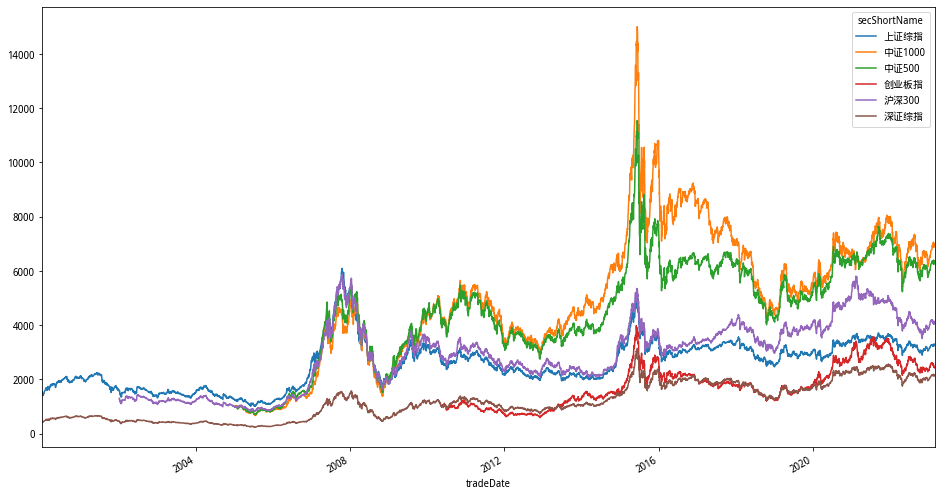

In [178]:
# Raw index plot
index_df.pivot(index='tradeDate',columns='secShortName',values='closeIndex').plot()

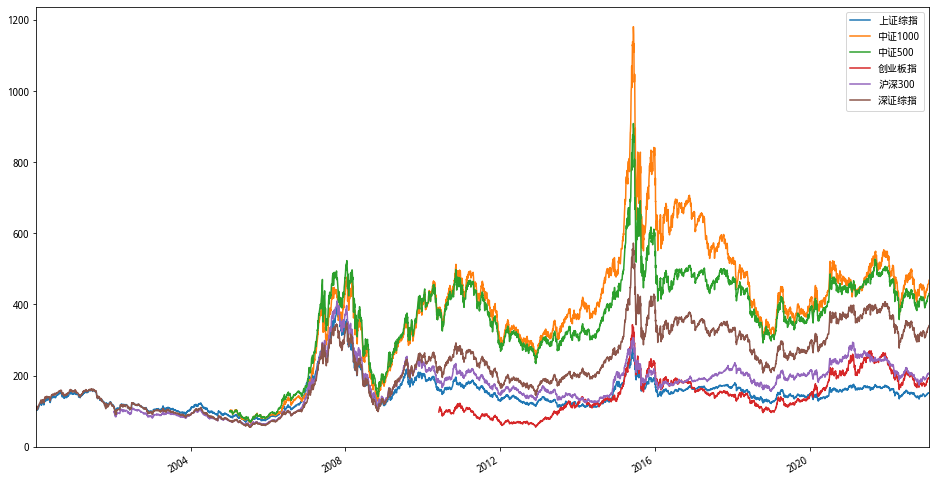

In [179]:
((1 + index_retx_df).cumprod()*100).plot()

早期的平稳可能是一种假象：数据到后面会越来越大。log return会看得更清楚

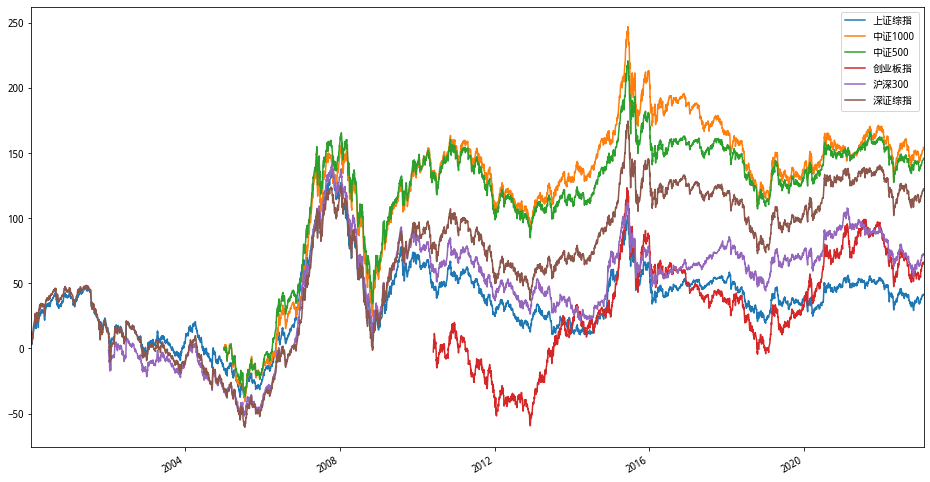

In [180]:
# log return
(np.log(1 + index_retx_df).cumsum()*100).plot()

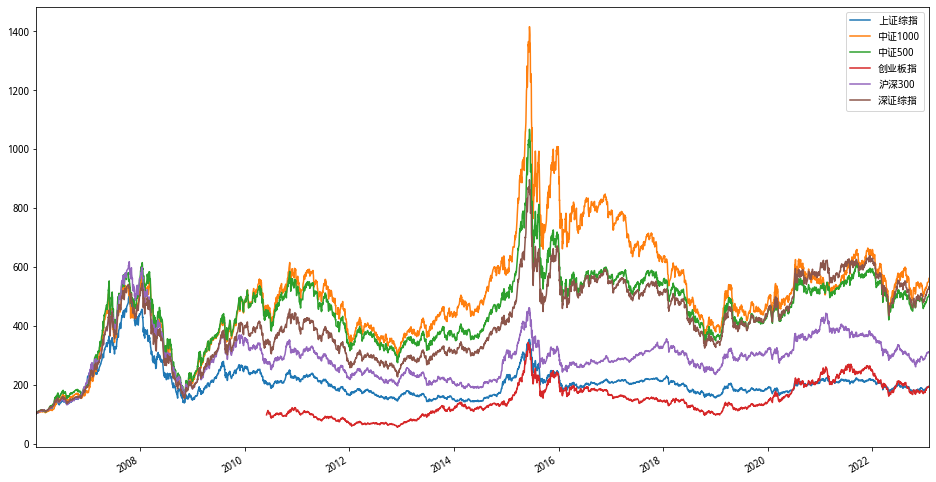

In [181]:
((1 + index_retx_df.loc['2006':'2023']).cumprod()*100).plot()

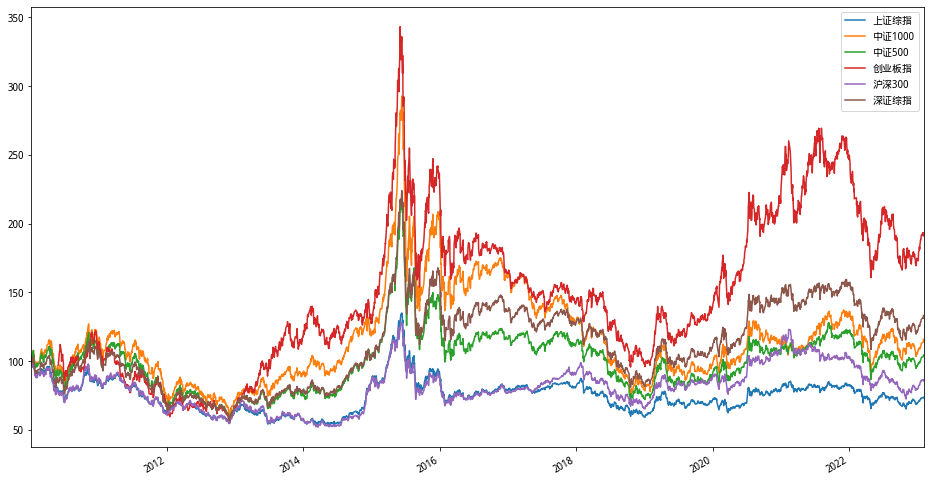

In [182]:
((1 + index_retx_df.loc['2010':'2023']).cumprod()*100).plot()

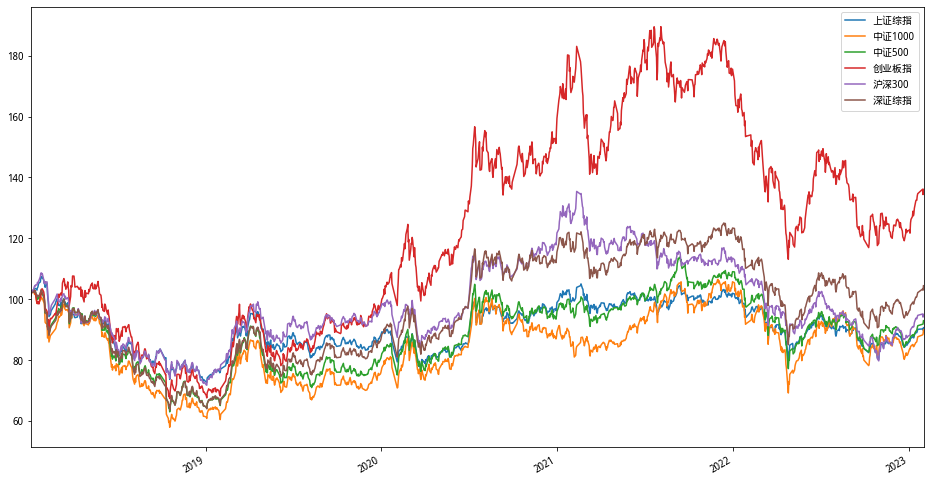

In [183]:
((1 + index_retx_df.loc['2018':'2023']).cumprod()*100).plot()

In [184]:
index_retx_df.describe()

上证综指       中证1000        中证500         创业板指        沪深300  \
count  5591.000000  4391.000000  4391.000000  3077.000000  5111.000000   
mean      0.000188     0.000543     0.000511     0.000403     0.000272   
std       0.015047     0.019465     0.018785     0.019397     0.016156   
min      -0.088484    -0.087943    -0.089605    -0.089187    -0.092478   
25%      -0.006518    -0.008074    -0.007709    -0.010001    -0.007357   
50%       0.000488     0.001884     0.001715     0.000557     0.000502   
75%       0.007291     0.011333     0.010703     0.011315     0.007957   
max       0.098516     0.097469     0.098603     0.071505     0.093851   

              深证综指  
count  5591.000000  
mean      0.000363  
std       0.016944  
min      -0.085510  
25%      -0.007573  
50%       0.001227  
75%       0.009404  
max       0.096788

In [185]:
0.019465*np.sqrt(250)

0.3077686732758875

In [186]:
0.015047*np.sqrt(250)

0.237913959762768

## Market return in US

In [187]:
us_df = pd.read_csv('./data/F-F_Research_Data_Factors_daily.csv',skiprows=3)
us_df.drop(us_df.index.values[-1],inplace=True)

In [188]:
us_df.rename(columns={'Unnamed: 0': 'date'},inplace=True)

In [189]:
us_df['date'] = pd.to_datetime(us_df['date'],format='%Y%m%d')

In [190]:
us_df['Mkt-RF'] = us_df['Mkt-RF']*0.01
us_df.set_index('date',inplace=True)

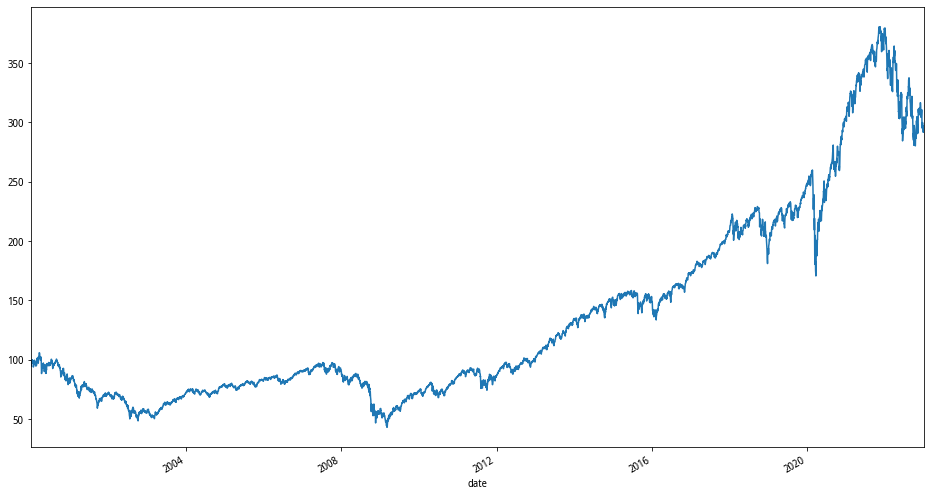

In [191]:
((1 + us_df.loc['2000':'2023','Mkt-RF']).cumprod()*100).plot()

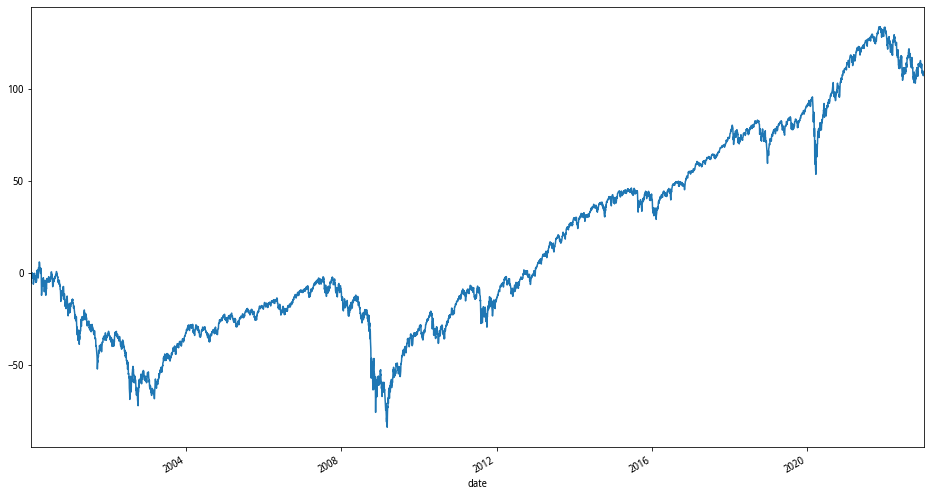

In [192]:
(np.log(1 + us_df.loc['2000':'2023','Mkt-RF']).cumsum()*100).plot()

In [193]:
us_df.loc['2000':'2022','Mkt-RF'].describe()

count    5787.000000
mean        0.000268
std         0.012682
min        -0.120000
25%        -0.005000
50%         0.000600
75%         0.006100
max         0.113500
Name: Mkt-RF, dtype: float64

In [194]:
0.012682*np.sqrt(250)

0.20052002643127695

## Industry Index Return

In [195]:
# 2023, https://www.swsresearch.com/institute_sw/allIndex/downloadCenter/industryType

shenwan_industry_idx1 = ['传媒','电力设备','电子','房地产','纺织服饰','非银金融','钢铁','公用事业','国防军工','环保','机械设备','基础化工','计算机','家用电器','建筑材料','建筑装饰','交通运输','煤炭','美容护理','农林牧渔','社会服务','石油石化','食品饮料','汽车','轻工制造','通信','综合','医药生物','银行','有色金属','商贸零售'] 

# shenwan_industry_idx1 = ["农林牧渔","基础化工","钢铁","有色金属","电子","家用电器","食品饮料","纺织服饰","轻工制造","医药生物","公用事业","交通运输","房地产","商贸零售","社会服务","综合","建筑材料","建筑装饰","电力设备","国防军工","计算机","传媒","通信","银行","非银金融","汽车","机械设备","煤炭","石油石化","环保","美容护理"]

In [196]:
len(shenwan_industry_idx1)

31

In [197]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万'))]

1016            申万50
1017            申万中小
1018            申万A指
1019            申万创业
1020          申万A股主板
1021        申万宏源专精特新
1022          申万农林牧渔
1023           申万林业Ⅱ
1024         申万农产品加工
1025         申万农业综合Ⅱ
1026            申万饲料
1027            申万渔业
1028           申万种植业
1029           申万养殖业
1030         申万动物保健Ⅱ
1031         申万农业综合Ⅱ
1032            申万采掘
1033         申万煤炭开采Ⅱ
1034         申万其他采掘Ⅱ
1035         申万石油开采Ⅱ
1036          申万采掘服务
1037          申万基础化工
1038        申万化工新材料Ⅱ
1039          申万化学纤维
1040          申万化学原料
1041          申万化学制品
1042          申万石油化工
1043            申万塑料
1044            申万橡胶
1045          申万农化制品
            ...     
10359    通联全A-申万有色金属
10360    通联全A-申万建筑材料
10361    通联全A-申万建筑装饰
10362    通联全A-申万电气设备
10363    通联全A-申万机械设备
10364    通联全A-申万国防军工
10365      通联全A-申万汽车
10366      通联全A-申万电子
10367    通联全A-申万家用电器
10368    通联全A-申万食品饮料
10369    通联全A-申万纺织服装
10370    通联全A-申万轻工制造
10371    通联全A-申万医药生物
10372    通联全A-申万公用事业
10373    通联全A-申万交通运输
10374     通联全A-申万房地产
10375      通联

In [198]:
shenwan_industry_idx1 = ['申万' + indry for indry in shenwan_industry_idx1]

In [199]:
shenwan_industry_idx1

['申万传媒',
 '申万电力设备',
 '申万电子',
 '申万房地产',
 '申万纺织服饰',
 '申万非银金融',
 '申万钢铁',
 '申万公用事业',
 '申万国防军工',
 '申万环保',
 '申万机械设备',
 '申万基础化工',
 '申万计算机',
 '申万家用电器',
 '申万建筑材料',
 '申万建筑装饰',
 '申万交通运输',
 '申万煤炭',
 '申万美容护理',
 '申万农林牧渔',
 '申万社会服务',
 '申万石油石化',
 '申万食品饮料',
 '申万汽车',
 '申万轻工制造',
 '申万通信',
 '申万综合',
 '申万医药生物',
 '申万银行',
 '申万有色金属',
 '申万商贸零售']

In [200]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万')) & 
                           (~index_info['secShortName'].str.contains('Ⅱ$'))]

1016            申万50
1017            申万中小
1018            申万A指
1019            申万创业
1020          申万A股主板
1021        申万宏源专精特新
1022          申万农林牧渔
1024         申万农产品加工
1026            申万饲料
1027            申万渔业
1028           申万种植业
1029           申万养殖业
1032            申万采掘
1036          申万采掘服务
1037          申万基础化工
1039          申万化学纤维
1040          申万化学原料
1041          申万化学制品
1042          申万石油化工
1043            申万塑料
1044            申万橡胶
1045          申万农化制品
1047            申万钢铁
1049          申万冶钢原料
1050            申万普钢
1052          申万有色金属
1053         申万金属新材料
1055           申万贵金属
1056           申万小金属
1057          申万工业金属
            ...     
10359    通联全A-申万有色金属
10360    通联全A-申万建筑材料
10361    通联全A-申万建筑装饰
10362    通联全A-申万电气设备
10363    通联全A-申万机械设备
10364    通联全A-申万国防军工
10365      通联全A-申万汽车
10366      通联全A-申万电子
10367    通联全A-申万家用电器
10368    通联全A-申万食品饮料
10369    通联全A-申万纺织服装
10370    通联全A-申万轻工制造
10371    通联全A-申万医药生物
10372    通联全A-申万公用事业
10373    通联全A-申万交通运输
10374     通联全A-申万房地产
10375      通联

In [201]:
index_info['secShortName'][index_info['secShortName'].str.contains('^申万.*Ⅰ$')]

1059    申万建筑建材Ⅰ
1062    申万机械设备Ⅰ
1078    申万交运设备Ⅰ
1085    申万信息设备Ⅰ
1142    申万金融服务Ⅰ
1165    申万信息服务Ⅰ
Name: secShortName, dtype: object

In [202]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1022  801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
1037  801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
1047  801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
1052  801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
1071  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
1090  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
1098  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   
1106  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
1110  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
1116  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
1123  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
1128  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
1138  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
1147  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
1155  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
1170  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
1176  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
1182  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
1186  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
1193  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
1202  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
1208  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
1211  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
1219  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
1220  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
1226  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
1245  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
1247  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
1251  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
1254  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
1258  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
1261  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
1022            L  2003-10-15         CNY  NaN  27540.0         NaN  
1037            L  2003-10-15         CNY  NaN  27540.0         NaN  
1047            L  2003-10-15         CNY  NaN  27540.0         NaN  
1052            L  2003-10-15         CNY  NaN  27540.0         NaN  
1071            L  2003-10-15         CNY  NaN  27540.0         NaN  
1090            L  2003-10-15         CNY  NaN  27540.0         NaN  
1098            L  2003-10-15         CNY  NaN  27540.0         NaN  
1106            L  2003-10-15         CNY  NaN  27540.0         NaN  
1110            L  2003-10-15         CNY  NaN  27540.0         NaN  
1116            L  2003-10-15         CNY  NaN  27540.0         NaN  
1123            L  2003-10-15         CNY  NaN  27540.0         NaN  
1128            L  2003-10-15         CNY  NaN  27540.0         NaN  
1138            L  2003-10-15         CNY  NaN  27540.0         NaN  
1147            L  2003-10-15         CNY  NaN  27540.0         NaN  
1155            L  2003-10-15         CNY  NaN  27540.0         NaN  
1170            L  2003-10-15         CNY  NaN  27540.0         NaN  
1176           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
1182            L  2014-02-21         CNY  NaN  27540.0         NaN  
1186            L  2014-02-21         CNY  NaN  27540.0         NaN  
1193            L  2014-02-21         CNY  NaN  27540.0         NaN  
1202            L  2014-02-21         CNY  NaN  27540.0         NaN  
1208            L  2014-02-21         CNY  NaN  27540.0         NaN  
1211            L  2014-0

In [203]:
len(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)])

32

In [204]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)].duplicated('secShortName',keep=False)

1022    False
1037     True
1047    False
1052    False
1071    False
1090    False
1098    False
1106    False
1110    False
1116    False
1123    False
1128    False
1138    False
1147    False
1155    False
1170    False
1176     True
1182    False
1186    False
1193    False
1202    False
1208    False
1211    False
1219    False
1220    False
1226    False
1245    False
1247    False
1251    False
1254    False
1258    False
1261    False
dtype: bool

In [205]:
set(shenwan_industry_idx1) - set(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]['secShortName'])

set()

#### The Industry index by Shenwan

In [206]:
index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].sort_values('secShortName')

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1128  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
1211  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
1123  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
1022  801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
1116  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
1147  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
1202  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
1176  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
1037  801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
1090  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
1182  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
1186  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
1138  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
1052  801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
1247  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
1245  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
1251  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
1258  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
1193  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
1071  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
1254  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
1155  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
1106  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
1170  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
1261  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   
1208  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
1110  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
1219  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
1047  801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
1220  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
1226  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
1098  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
1128            L  2003-10-15         CNY  NaN  27540.0         NaN  
1211            L  2014-02-21         CNY  NaN  27540.0         NaN  
1123            L  2003-10-15         CNY  NaN  27540.0         NaN  
1022            L  2003-10-15         CNY  NaN  27540.0         NaN  
1116            L  2003-10-15         CNY  NaN  27540.0         NaN  
1147            L  2003-10-15         CNY  NaN  27540.0         NaN  
1202            L  2014-02-21         CNY  NaN  27540.0         NaN  
1176           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
1037            L  2003-10-15         CNY  NaN  27540.0         NaN  
1090            L  2003-10-15         CNY  NaN  27540.0         NaN  
1182            L  2014-02-21         CNY  NaN  27540.0         NaN  
1186            L  2014-02-21         CNY  NaN  27540.0         NaN  
1138            L  2003-10-15         CNY  NaN  27540.0         NaN  
1052            L  2003-10-15         CNY  NaN  27540.0         NaN  
1247            L  2014-02-21         CNY  NaN  27540.0         NaN  
1245            L  2014-02-21         CNY  NaN  27540.0         NaN  
1251            L  2021-12-13         CNY  NaN  27540.0         NaN  
1258            L  2021-12-13         CNY  NaN  27540.0         NaN  
1193            L  2014-02-21         CNY  NaN  27540.0         NaN  
1071            L  2003-10-15         CNY  NaN  27540.0         NaN  
1254            L  2021-12-13         CNY  NaN  27540.0         NaN  
1155            L  2003-10-15         CNY  NaN  27540.0         NaN  
1106            L  2003-1

In [207]:
industry_id = index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].drop_duplicates(keep='last').loc[:,'secID']

In [208]:
industry_id

1022    801010.ZICN
1037    801030.ZICN
1047    801040.ZICN
1052    801050.ZICN
1071    801080.ZICN
1090    801110.ZICN
1098    801120.ZICN
1106    801130.ZICN
1110    801140.ZICN
1116    801150.ZICN
1123    801160.ZICN
1128    801170.ZICN
1138    801180.ZICN
1147    801200.ZICN
1155    801210.ZICN
1170    801230.ZICN
1176    801290.ZICN
1182    801710.ZICN
1186    801720.ZICN
1193    801730.ZICN
1202    801740.ZICN
1208    801750.ZICN
1211    801760.ZICN
1219    801770.ZICN
1220    801780.ZICN
1226    801790.ZICN
1245    801880.ZICN
1247    801890.ZICN
1251    801950.ZICN
1254    801960.ZICN
1258    801970.ZICN
1261    801980.ZICN
Name: secID, dtype: object

In [209]:
index_df = DataAPI.MktIdxdGet(indexID=list(industry_id) + ['000001.ZICN'],beginDate="20031015",endDate="20231231",
                              field=['indexID','secShortName','tradeDate','preCloseIndex',
                                     'closeIndex','turnoverVol','turnoverValue','CHG','CHGPct'],pandas="1")
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
index_ret_df = index_df.pivot(index='tradeDate',columns='indexID',values='CHGPct')
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

In [210]:
index_df

indexID secShortName  tradeDate  preCloseIndex  closeIndex  \
0       000001.ZICN         上证综指 2003-10-15       1388.172    1383.098   
1       000001.ZICN         上证综指 2003-10-16       1383.098    1365.505   
2       000001.ZICN         上证综指 2003-10-17       1365.505    1370.582   
3       000001.ZICN         上证综指 2003-10-20       1370.582    1359.498   
4       000001.ZICN         上证综指 2003-10-21       1359.498    1364.301   
5       000001.ZICN         上证综指 2003-10-22       1364.301    1398.010   
6       000001.ZICN         上证综指 2003-10-23       1398.010    1386.653   
7       000001.ZICN         上证综指 2003-10-24       1386.653    1381.830   
8       000001.ZICN         上证综指 2003-10-27       1381.830    1369.463   
9       000001.ZICN         上证综指 2003-10-28       1369.463    1369.325   
10      000001.ZICN         上证综指 2003-10-29       1369.325    1361.487   
11      000001.ZICN         上证综指 2003-10-30       1361.487    1344.633   
12      000001.ZICN         上证综指 2003-10-31       1344.633    1348.303   
13      000001.ZICN         上证综指 2003-11-03       1348.303    1364.055   
14      000001.ZICN         上证综指 2003-11-04       1364.055    1389.545   
15      000001.ZICN         上证综指 2003-11-05       1389.545    1385.110   
16      000001.ZICN         上证综指 2003-11-06       1385.110    1356.790   
17      000001.ZICN         上证综指 2003-11-07       1356.790    1335.205   
18      000001.ZICN         上证综指 2003-11-10       1335.205    1340.097   
19      000001.ZICN         上证综指 2003-11-11       1340.097    1343.616   
20      000001.ZICN         上证综指 2003-11-12       1343.616    1317.792   
21      000001.ZICN         上证综指 2003-11-13       1317.792    1319.608   
22      000001.ZICN         上证综指 2003-11-14       1319.608    1331.051   
23      000001.ZICN         上证综指 2003-11-17       1331.051    1328.103   
24      000001.ZICN         上证综指 2003-11-18       1328.103    1316.562   
25      000001.ZICN         上证综指 2003-11-19       1316.562    1338.870   
26      000001.ZICN         上证综指 2003-11-20       1338.870    1376.506   
27      000001.ZICN         上证综指 2003-11-21       1376.506    1361.559   
28      000001.ZICN         上证综指 2003-11-24       1361.559    1404.008   
29      000001.ZICN         上证综指 2003-11-25       1404.008    1408.415   
...             ...          ...        ...            ...         ...   
151055  801980.ZICN       申万美容护理 2023-01-09       7155.480    7276.400   
151056  801980.ZICN       申万美容护理 2023-01-10       7276.400    7347.220   
151057  801980.ZICN       申万美容护理 2023-01-11       7347.220    7274.040   
151058  801980.ZICN       申万美容护理 2023-01-12       7274.040    7191.010   
151059  801980.ZICN       申万美容护理 2023-01-13       7191.010    7308.740   
151060  801980.ZICN       申万美容护理 2023-01-16       7308.740    7427.930   
151061  801980.ZICN       申万美容护理 2023-01-17       7427.930    7397.130   
151062  801980.ZICN       申万美容护理 2023-01-18       7397.130    7334.550   
151063  801980.ZICN       申万美容护理 2023-01-19       7334.550    7355.000   
151064  801980.ZICN       申万美容护理 2023-01-20       7355.000    7277.650   
151065  801980.ZICN       申万美容护理 2023-01-30       7277.650    7284.920   
151066  801980.ZICN       申万美容护理 2023-01-31       7284.920    7209.510   
151067  801980.ZICN       申万美容护理 2023-02-01       7209.510    7279.800   
151068  801980.ZICN       申万美容护理 2023-02-02       7279.800    7283.000   
151069  801980.ZICN       申万美容护理 2023-02-03       7283.000    7224.930   
151070  801980.ZICN       申万美容护理 2023-02-06       7224.930    7141.430   
151071  801980.ZICN       申万美容护理 2023-02-07       7141.430    7157.190   
151072  801980.ZICN       申万美容护理 2023-02-08       7157.190    7121.950   
151073  801980.ZICN       申万美容护理 2023-02-09       7121.950    7236.810   
151074  801980.ZICN       申万美容护理 2023-02-10       7236.810    7276.230   
151075  801980.ZICN       申万美容护理 2023-02-13       7276.230    7582.240   
151076  801980.ZICN       申万美容护理 2023-02-14       7582.240    7593.810   
151077  801980.Z

In [211]:
industry_id_name = dict(zip(index_df['indexID'],index_df['secShortName']))

In [212]:
industry_id_name

{'000001.ZICN': '上证综指',
 '801010.ZICN': '申万农林牧渔',
 '801030.ZICN': '申万基础化工',
 '801040.ZICN': '申万钢铁',
 '801050.ZICN': '申万有色金属',
 '801080.ZICN': '申万电子',
 '801110.ZICN': '申万家用电器',
 '801120.ZICN': '申万食品饮料',
 '801130.ZICN': '申万纺织服饰',
 '801140.ZICN': '申万轻工制造',
 '801150.ZICN': '申万医药生物',
 '801160.ZICN': '申万公用事业',
 '801170.ZICN': '申万交通运输',
 '801180.ZICN': '申万房地产',
 '801200.ZICN': '申万商贸零售',
 '801210.ZICN': '申万社会服务',
 '801230.ZICN': '申万综合',
 '801290.ZICN': '申万基础化工',
 '801710.ZICN': '申万建筑材料',
 '801720.ZICN': '申万建筑装饰',
 '801730.ZICN': '申万电力设备',
 '801740.ZICN': '申万国防军工',
 '801750.ZICN': '申万计算机',
 '801760.ZICN': '申万传媒',
 '801770.ZICN': '申万通信',
 '801780.ZICN': '申万银行',
 '801790.ZICN': '申万非银金融',
 '801880.ZICN': '申万汽车',
 '801890.ZICN': '申万机械设备',
 '801950.ZICN': '申万煤炭',
 '801960.ZICN': '申万石油石化',
 '801970.ZICN': '申万环保',
 '801980.ZICN': '申万美容护理'}

In [213]:
index_df.head()

indexID secShortName  tradeDate  preCloseIndex  closeIndex  \
0  000001.ZICN         上证综指 2003-10-15       1388.172    1383.098   
1  000001.ZICN         上证综指 2003-10-16       1383.098    1365.505   
2  000001.ZICN         上证综指 2003-10-17       1365.505    1370.582   
3  000001.ZICN         上证综指 2003-10-20       1370.582    1359.498   
4  000001.ZICN         上证综指 2003-10-21       1359.498    1364.301   

   turnoverVol  turnoverValue     CHG    CHGPct  
0  671017300.0   4.772951e+09  -5.074 -0.003655  
1  585887500.0   4.463241e+09 -17.593 -0.012720  
2  528554800.0   3.893039e+09   5.077  0.003718  
3  535722900.0   3.759462e+09 -11.084 -0.008087  
4  697888200.0   4.787531e+09   4.803  0.003533

In [214]:
index_retx_df.head()

000001.ZICN  801010.ZICN  801030.ZICN  801040.ZICN  801050.ZICN  \
2003-10-15    -0.003730    -0.004897    -0.002104    -0.000692    -0.002423   
2003-10-16    -0.012795    -0.016645    -0.012041    -0.008257    -0.000605   
2003-10-17     0.003643     0.000658     0.003923     0.006985    -0.000429   
2003-10-20    -0.008162    -0.007592    -0.007508     0.004683    -0.004754   
2003-10-21     0.003459     0.004975     0.002568     0.011718     0.008316   

            801080.ZICN  801110.ZICN  801120.ZICN  801130.ZICN  801140.ZICN  \
2003-10-15    -0.000160    -0.000950    -0.000379    -0.000555    -0.006021   
2003-10-16    -0.020983    -0.016202    -0.010727    -0.009225    -0.013666   
2003-10-17     0.003418     0.003256     0.001005    -0.000261     0.003411   
2003-10-20    -0.007695    -0.015114    -0.002786    -0.009900    -0.012482   
2003-10-21     0.006414     0.004014     0.001007    -0.000533    -0.000052   

            ...  801760.ZICN  801770.ZICN  801780.ZICN  801790.ZICN  \
2003-10-15  ...    -0.002227    -0.004183    -0.009015    -0.000382   
2003-10-16  ...    -0.038934    -0.010622    -0.007758    -0.011809   
2003-10-17  ...     0.003991     0.007493     0.001992    -0.008172   
2003-10-20  ...    -0.013761    -0.008072    -0.007533    -0.041855   
2003-10-21  ...     0.007289     0.004209    -0.015599    -0.002442   

            801880.ZICN  801890.ZICN  801950.ZICN  801960.ZICN  801970.ZICN  \
2003-10-15    -0.008126    -0.007362    -0.005163    -0.005211    -0.002654   
2003-10-16    -0.017021    -0.010059    -0.010085    -0.012954    -0.013539   
2003-10-17    -0.001675    -0.001646     0.002263     0.005544     0.004435   
2003-10-20    -0.008665    -0.012472     0.003845    -0.003705    -0.009598   
2003-10-21     0.002693     0.000308     0.003843     0.004290    -0.000925   

            801980.ZICN  
2003-10-15     0.000467  
2003-10-16    -0.024300  
2003-10-17     0.001165  
2003-10-20    -0.020807  
2003-10-21    -0.000008  

[5 rows x 33 columns]

In [215]:
index_retx_df.rename(mapper=industry_id_name, axis=1, inplace=True) # 将column名称改变

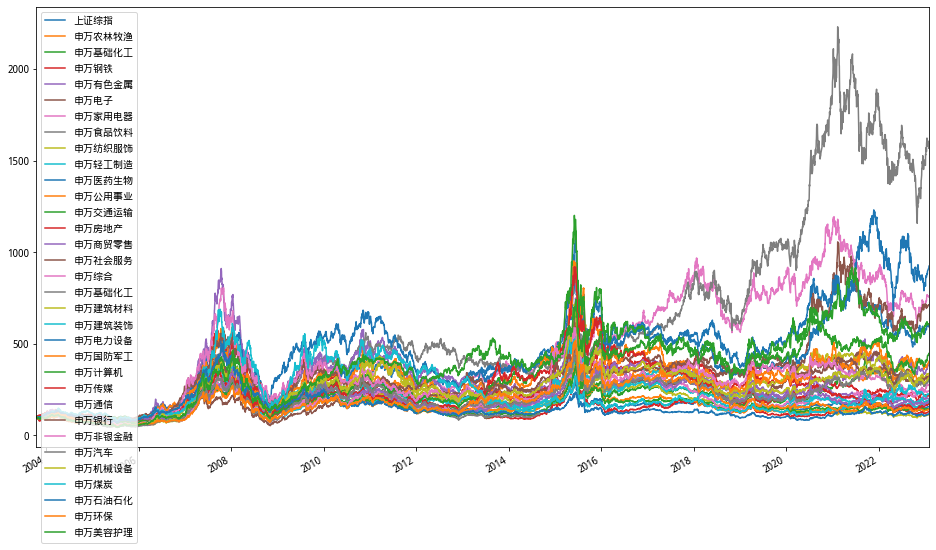

In [216]:
((1 + index_retx_df).cumprod()*100).plot()

In [217]:
industry_id_name_list = list(industry_id_name.values())

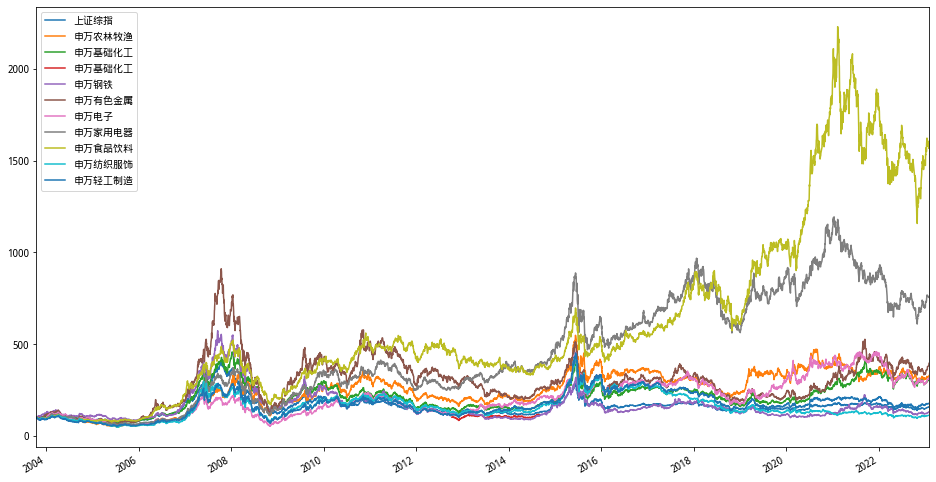

In [218]:
((1 + index_retx_df.loc[:,industry_id_name_list[0:10]]).cumprod()*100).plot()

食品饮料，家用电器

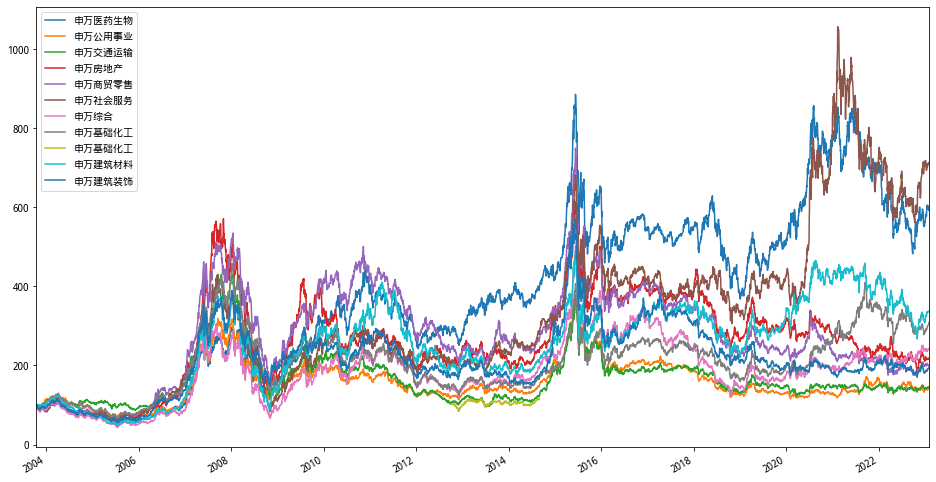

In [219]:
((1 + index_retx_df.loc[:,industry_id_name_list[10:20]]).cumprod()*100).plot()

社会服务，医药生物

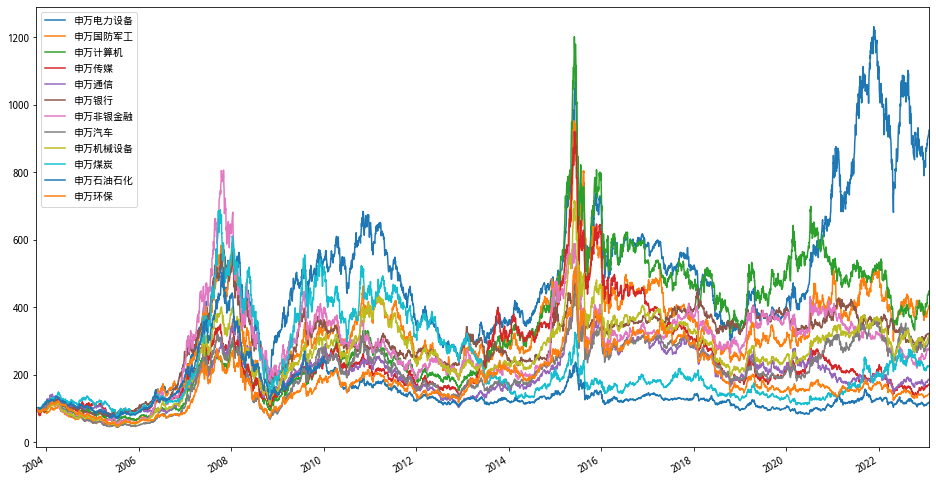

In [220]:
((1 + index_retx_df.loc[:,industry_id_name_list[20:32]]).cumprod()*100).plot()

电力设备

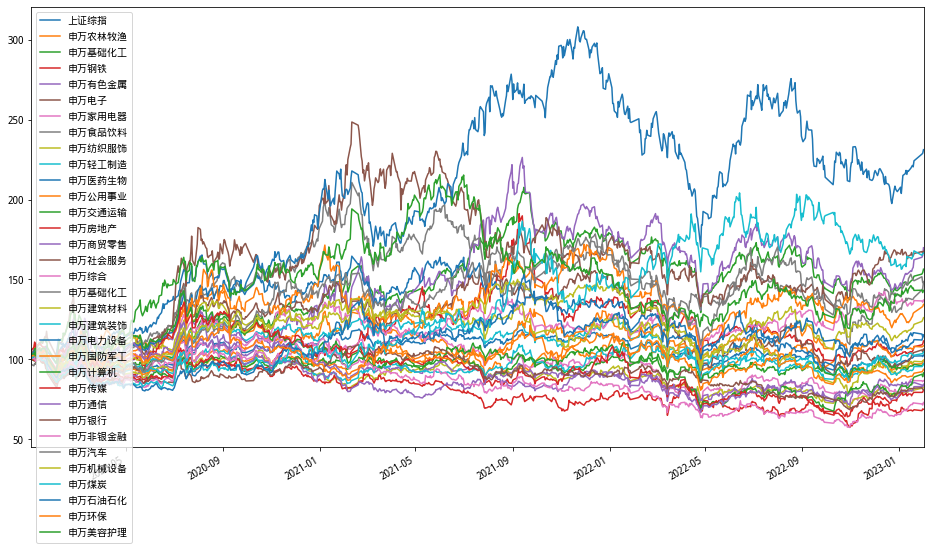

In [221]:
((1 + index_retx_df['2020':'2023']).cumprod()*100).plot()

#### 食品饮料, 家用电器，社会服务，医药生物，电力设备

In [222]:
cols = ['上证综指','申万食品饮料','申万家用电器','申万社会服务','申万医药生物','申万电力设备']

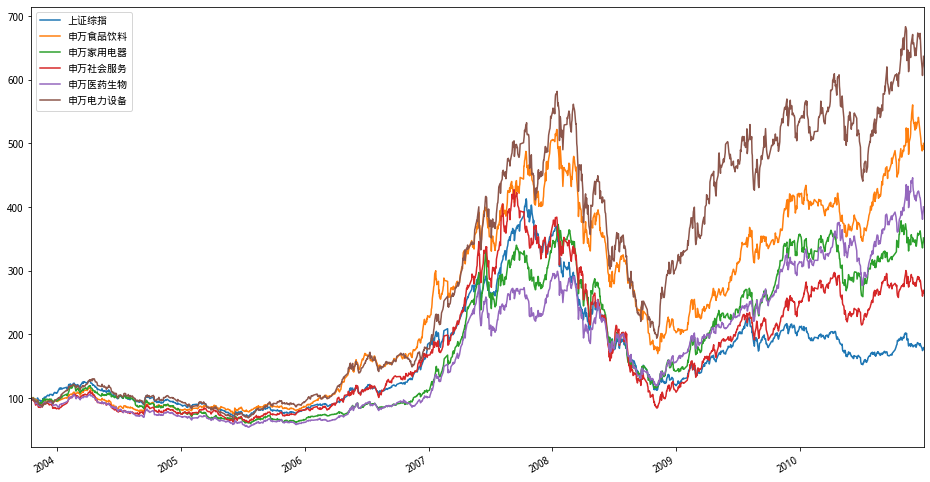

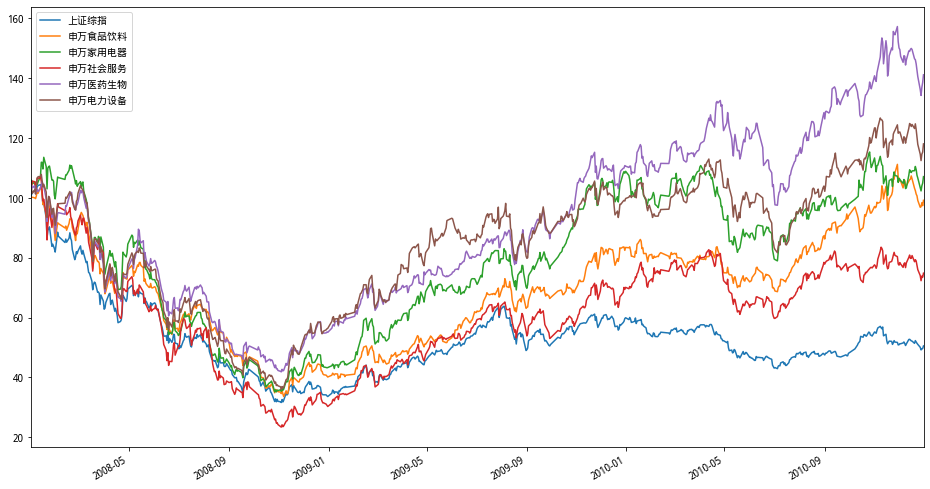

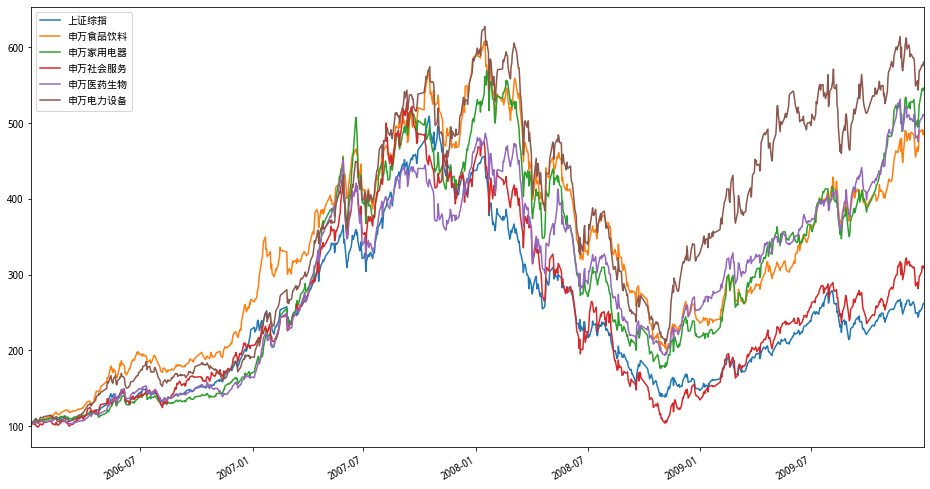

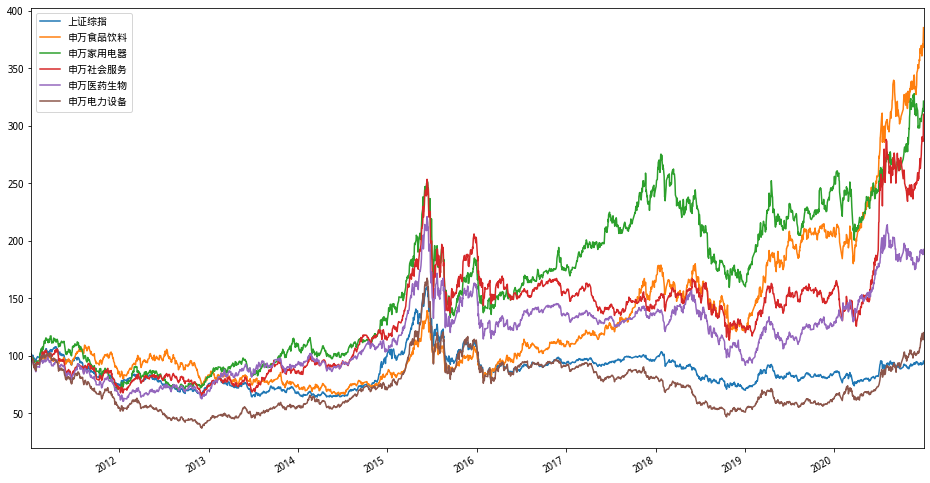

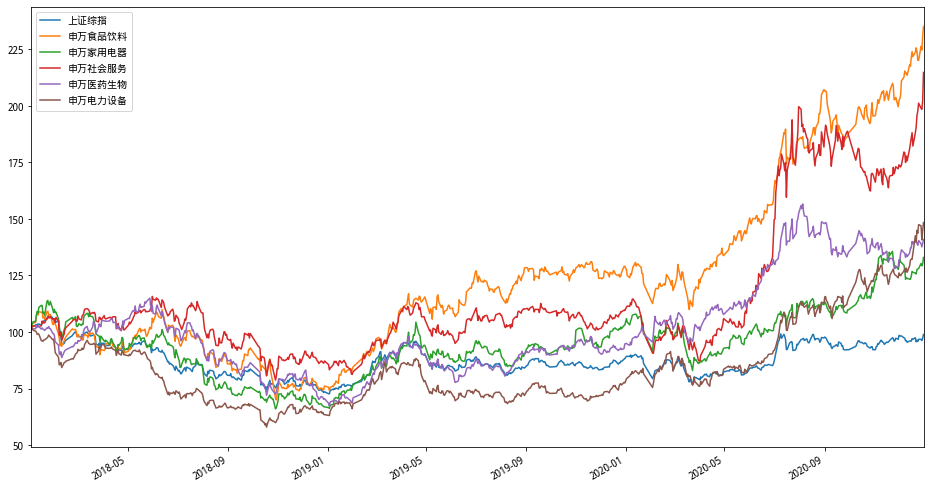

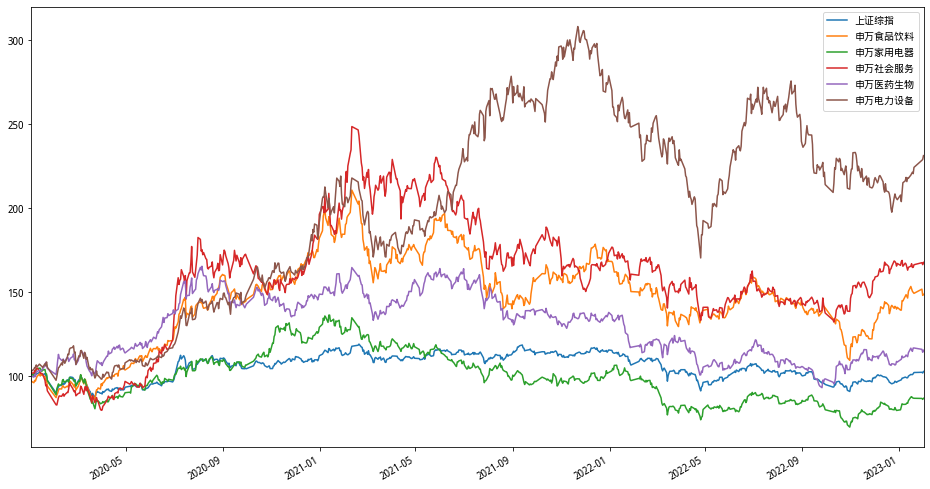

In [223]:
((1 + index_retx_df.loc['2003':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2008':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2006':'2009',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2011':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2018':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2020':'2023',cols]).cumprod()*100).plot()

# Individual Stocks

观察以下几个指标：
- 股票数目
- 市值
- 成交额
- 换手率

按照以下几种分组：
- 沪深两市
- 板块
- 市值

In [224]:
# %%time
# # Need about 4 mins to read. Data size is about 450 MB.
# stk_df = DataAPI.MktEqudAdjAfGet(secID=stk_id,beginDate="20150101",endDate="20231231",isOpen=1,
#                                            field=["secID","secShortName","exchangeCD","tradeDate",
#                                                   "preClosePrice","closePrice","turnoverVol",
#                                                   "turnoverValue","dealAmount","turnoverRate",
#                                                   "negMarketValue","marketValue"],pandas="1")

In [225]:
# stk_df.to_pickle('./data/stk_df.pkl')

In [226]:
stk_df = pd.read_pickle('./data/stk_df.pkl')

In [227]:
stk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953729 entries, 0 to 4953728
Data columns (total 12 columns):
secID             object
secShortName      object
exchangeCD        object
tradeDate         object
preClosePrice     float64
closePrice        float64
turnoverVol       int64
turnoverValue     float64
dealAmount        float64
turnoverRate      float64
negMarketValue    float64
marketValue       float64
dtypes: float64(7), int64(1), object(4)
memory usage: 453.5+ MB


In [228]:
# stk_df.loc[(stk_df['tradeDate']>='2022-01-01') & (stk_df['tradeDate']<='2023-03-01')].to_pickle('./data/stk_df_22_23.pkl') # for exercise 1

In [229]:
stk_df.head()

secID secShortName exchangeCD   tradeDate  preClosePrice  closePrice  \
0  000001.XSHE         平安银行       XSHE  2015-01-05       1293.044    1307.737   
1  000001.XSHE         平安银行       XSHE  2015-01-06       1307.737    1288.146   
2  000001.XSHE         平安银行       XSHE  2015-01-07       1288.146    1263.656   
3  000001.XSHE         平安银行       XSHE  2015-01-08       1263.656    1221.208   
4  000001.XSHE         平安银行       XSHE  2015-01-09       1221.208    1231.004   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0      4966040   4.565388e+09     92478.0        0.0291    1.575841e+11   
1      3761152   3.453446e+09     80325.0        0.0220    1.552233e+11   
2      2951601   2.634796e+09     72697.0        0.0173    1.522723e+11   
3      2443951   2.128003e+09     68734.0        0.0143    1.471572e+11   
4      4355039   3.835378e+09     99882.0        0.0255    1.483376e+11   

    marketValue  
0  1.830268e+11  
1  1.802848e+11  
2  1.768574e+11  
3  1.709164e+11  
4  1.722874e+11

In [230]:
sec_sector = DataAPI.EquGet(secID=stk_id,field=["secID","ListSector"],pandas="1")

In [231]:
# industry = DataAPI.EquIndustryGet(secID=stk_id,industryVersionCD="010303",field=['secID','industryName1',''],pandas="1")

# industry['industryName1'].unique()

# industry.drop_duplicates()

In [232]:
stk_df = pd.merge(stk_df, sec_sector, on="secID")

In [233]:
stk_df

secID secShortName exchangeCD   tradeDate  preClosePrice  \
0        000001.XSHE         平安银行       XSHE  2015-01-05       1293.044   
1        000001.XSHE         平安银行       XSHE  2015-01-06       1307.737   
2        000001.XSHE         平安银行       XSHE  2015-01-07       1288.146   
3        000001.XSHE         平安银行       XSHE  2015-01-08       1263.656   
4        000001.XSHE         平安银行       XSHE  2015-01-09       1221.208   
5        000001.XSHE         平安银行       XSHE  2015-01-12       1231.004   
6        000001.XSHE         平安银行       XSHE  2015-01-13       1205.698   
7        000001.XSHE         平安银行       XSHE  2015-01-14       1198.351   
8        000001.XSHE         平安银行       XSHE  2015-01-15       1208.963   
9        000001.XSHE         平安银行       XSHE  2015-01-16       1253.044   
10       000001.XSHE         平安银行       XSHE  2015-01-19       1254.677   
11       000001.XSHE         平安银行       XSHE  2015-01-20       1128.964   
12       000001.XSHE         平安银行       XSHE  2015-01-21       1128.964   
13       000001.XSHE         平安银行       XSHE  2015-01-22       1177.127   
14       000001.XSHE         平安银行       XSHE  2015-01-23       1167.331   
15       000001.XSHE         平安银行       XSHE  2015-01-26       1175.494   
16       000001.XSHE         平安银行       XSHE  2015-01-27       1170.596   
17       000001.XSHE         平安银行       XSHE  2015-01-28       1142.025   
18       000001.XSHE         平安银行       XSHE  2015-01-29       1147.739   
19       000001.XSHE         平安银行       XSHE  2015-01-30       1134.678   
20       000001.XSHE         平安银行       XSHE  2015-02-02       1137.127   
21       000001.XSHE         平安银行       XSHE  2015-02-03       1112.638   
22       000001.XSHE         平安银行       XSHE  2015-02-04       1138.760   
23       000001.XSHE         平安银行       XSHE  2015-02-05       1119.168   
24       000001.XSHE         平安银行       XSHE  2015-02-06       1125.699   
25       000001.XSHE         平安银行       XSHE  2015-02-09       1102.842   
26       000001.XSHE         平安银行       XSHE  2015-02-10       1103.658   
27       000001.XSHE         平安银行       XSHE  2015-02-11       1124.066   
28       000001.XSHE         平安银行       XSHE  2015-02-12       1120.801   
29       000001.XSHE         平安银行       XSHE  2015-02-13       1131.413   
...              ...          ...        ...         ...            ...   
4953699  900957.XSHG         凌云B股       XSHG  2023-01-09          0.587   
4953700  900957.XSHG         凌云B股       XSHG  2023-01-10          0.588   
4953701  900957.XSHG         凌云B股       XSHG  2023-01-11          0.600   
4953702  900957.XSHG         凌云B股       XSHG  2023-01-12          0.592   
4953703  900957.XSHG         凌云B股       XSHG  2023-01-13          0.588   
4953704  900957.XSHG         凌云B股       XSHG  2023-01-16          0.586   
4953705  900957.XSHG         凌云B股       XSHG  2023-01-17          0.598   
4953706  900957.XSHG         凌云B股       XSHG  2023-01-18          0.597   
4953707  900957.XSHG         凌云B股       XSHG  2023-01-19          0.593   
4953708  900957.XSHG         凌云B股       XSHG  2023-01-20          0.595   
4953709  900957.XSHG         凌云B股       XSHG  2023-01-30          0.595   
4953710  900957.XSHG         凌云B股       XSHG  2023-01-31          0.593   
4953711  900957.XSHG         凌云B股       XSHG  2023-02-01          0.590   
4953712  900957.XSHG         凌云B股       XSHG  2023-02-02          0.602   
4953713  900957.XSHG         凌云B股       XSHG  2023-02-03          0.598   
4953714  900957.XSHG         凌云B股       XSHG  2023-02-06          0.593   
4953715  900957.XSHG         凌云B股       XSHG  2023-02-07          0.589   
4953716  900957.XSHG         凌云B股       XSHG  2023-02-08          0.587   
4953717  900957.XSHG         凌云B股       XSHG  2023-02-09          0.582   
4953718  900957.XSHG         凌云B股       XSHG  2023-02-10          0.581   
4953719  900957.XSHG         凌云B股       XSHG  2023-02-13          0.580   
4953720  900957.XSHG         凌云B股       

In [234]:
stk_df['tradeDate'] = pd.to_datetime(stk_df['tradeDate'], format='%Y-%m-%d')

In [235]:
stk_df.set_index(['secID','tradeDate'],inplace=True)

In [236]:
stk_df['yearMonth'] = stk_df.index.get_level_values(1).to_period('M') # Change to Month

In [237]:
stk_df

secShortName exchangeCD  preClosePrice  closePrice  \
secID       tradeDate                                                       
000001.XSHE 2015-01-05         平安银行       XSHE       1293.044    1307.737   
            2015-01-06         平安银行       XSHE       1307.737    1288.146   
            2015-01-07         平安银行       XSHE       1288.146    1263.656   
            2015-01-08         平安银行       XSHE       1263.656    1221.208   
            2015-01-09         平安银行       XSHE       1221.208    1231.004   
            2015-01-12         平安银行       XSHE       1231.004    1205.698   
            2015-01-13         平安银行       XSHE       1205.698    1198.351   
            2015-01-14         平安银行       XSHE       1198.351    1208.963   
            2015-01-15         平安银行       XSHE       1208.963    1253.044   
            2015-01-16         平安银行       XSHE       1253.044    1254.677   
            2015-01-19         平安银行       XSHE       1254.677    1128.964   
            2015-01-20         平安银行       XSHE       1128.964    1128.964   
            2015-01-21         平安银行       XSHE       1128.964    1177.127   
            2015-01-22         平安银行       XSHE       1177.127    1167.331   
            2015-01-23         平安银行       XSHE       1167.331    1175.494   
            2015-01-26         平安银行       XSHE       1175.494    1170.596   
            2015-01-27         平安银行       XSHE       1170.596    1142.025   
            2015-01-28         平安银行       XSHE       1142.025    1147.739   
            2015-01-29         平安银行       XSHE       1147.739    1134.678   
            2015-01-30         平安银行       XSHE       1134.678    1137.127   
            2015-02-02         平安银行       XSHE       1137.127    1112.638   
            2015-02-03         平安银行       XSHE       1112.638    1138.760   
            2015-02-04         平安银行       XSHE       1138.760    1119.168   
            2015-02-05         平安银行       XSHE       1119.168    1125.699   
            2015-02-06         平安银行       XSHE       1125.699    1102.842   
            2015-02-09         平安银行       XSHE       1102.842    1103.658   
            2015-02-10         平安银行       XSHE       1103.658    1124.066   
            2015-02-11         平安银行       XSHE       1124.066    1120.801   
            2015-02-12         平安银行       XSHE       1120.801    1131.413   
            2015-02-13         平安银行       XSHE       1131.413    1138.760   
...                             ...        ...            ...         ...   
900957.XSHG 2023-01-09         凌云B股       XSHG          0.587       0.588   
            2023-01-10         凌云B股       XSHG          0.588       0.600   
            2023-01-11         凌云B股       XSHG          0.600       0.592   
            2023-01-12         凌云B股       XSHG          0.592       0.588   
            2023-01-13         凌云B股       XSHG          0.588       0.586   
            2023-01-16         凌云B股       XSHG          0.586       0.598   
            2023-01-17         凌云B股       XSHG          0.598       0.597   
            2023-01-18         凌云B股       XSHG          0.597       0.593   
            2023-01-19         凌云B股       XSHG          0.593       0.595   
            2023-01-20         凌云B股       XSHG          0.595       0.595   
            2023-01-30         凌云B股       XSHG          0.595       0.593   
            2023-01-31         凌云B股       XSHG          0.593       0.590   
            2023-02-01         凌云B股       XSHG          0.590       0.602   
            2023-02-02         凌云B股       XSHG          0.602       0.598   
            2023-02-03         凌云B股       XSHG          0.598       0.593   
            2023-02-06         凌云B股       XSHG          0.593       0.589   
            2023-02-07         凌云B股       XSHG          0.589       0.587   
            2023-02-08         凌云B股       XSHG          0.587       0.582   
            2023-02-09         凌云B股       XSHG          0.582       0.581   
            2023-02

In [238]:
q33 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.33)
q67 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.67)

In [239]:
q33.name = 'negMarketValue_q33'
q67.name = 'negMarketValue_q67'

In [240]:
stk_df.reset_index(inplace=True)

In [241]:
stk_df = pd.merge(stk_df,q33,on='yearMonth')
stk_df = pd.merge(stk_df,q67,on='yearMonth')

In [242]:
stk_df['size'] = 'small'

stk_df.loc[(stk_df['negMarketValue'] > stk_df['negMarketValue_q33']) & (stk_df['negMarketValue'] <= stk_df['negMarketValue_q67']), 'size'] = 'medium'

stk_df.loc[stk_df['negMarketValue'] > stk_df['negMarketValue_q67'], 'size'] = 'large'

In [243]:
stk_df.head()

secID  tradeDate secShortName exchangeCD  preClosePrice  closePrice  \
0  000001.XSHE 2015-01-05         平安银行       XSHE       1293.044    1307.737   
1  000001.XSHE 2015-01-06         平安银行       XSHE       1307.737    1288.146   
2  000001.XSHE 2015-01-07         平安银行       XSHE       1288.146    1263.656   
3  000001.XSHE 2015-01-08         平安银行       XSHE       1263.656    1221.208   
4  000001.XSHE 2015-01-09         平安银行       XSHE       1221.208    1231.004   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0      4966040   4.565388e+09     92478.0        0.0291    1.575841e+11   
1      3761152   3.453446e+09     80325.0        0.0220    1.552233e+11   
2      2951601   2.634796e+09     72697.0        0.0173    1.522723e+11   
3      2443951   2.128003e+09     68734.0        0.0143    1.471572e+11   
4      4355039   3.835378e+09     99882.0        0.0255    1.483376e+11   

    marketValue ListSector yearMonth  negMarketValue_q33  negMarketValue_q67  \
0  1.830268e+11         主板   2015-01        2.808301e+09        6.403952e+09   
1  1.802848e+11         主板   2015-01        2.808301e+09        6.403952e+09   
2  1.768574e+11         主板   2015-01        2.808301e+09        6.403952e+09   
3  1.709164e+11         主板   2015-01        2.808301e+09        6.403952e+09   
4  1.722874e+11         主板   2015-01        2.808301e+09        6.403952e+09   

    size  
0  large  
1  large  
2  large  
3  large  
4  large

## 股票数目

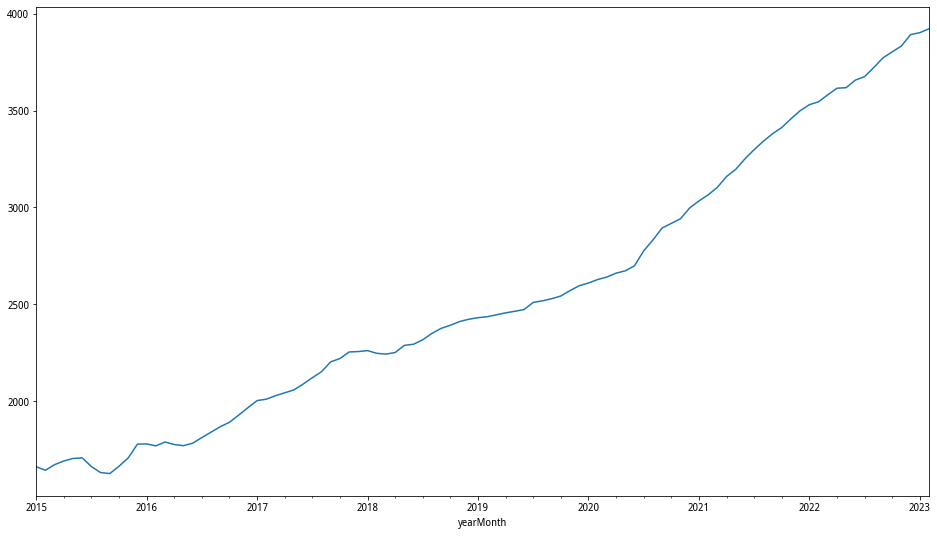

In [244]:
stk_df.groupby('yearMonth')['secShortName'].nunique().plot()

In [245]:
n_stk_by_list = stk_df.groupby(['ListSector','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='ListSector',values='secShortName')

In [246]:
n_stk_by_list

ListSector      主板    创业板    北交所    科创板
yearMonth                              
2015-01     1450.0  210.0    NaN    NaN
2015-02     1434.0  208.0    NaN    NaN
2015-03     1461.0  210.0    NaN    NaN
2015-04     1469.0  221.0    NaN    NaN
2015-05     1473.0  230.0    NaN    NaN
2015-06     1457.0  249.0    NaN    NaN
2015-07     1422.0  239.0    NaN    NaN
2015-08     1399.0  231.0    NaN    NaN
2015-09     1386.0  239.0    NaN    NaN
2015-10     1419.0  244.0    NaN    NaN
2015-11     1453.0  253.0    NaN    NaN
2015-12     1514.0  263.0    NaN    NaN
2016-01     1516.0  262.0    NaN    NaN
2016-02     1507.0  261.0    NaN    NaN
2016-03     1522.0  266.0    NaN    NaN
2016-04     1520.0  255.0    NaN    NaN
2016-05     1511.0  258.0    NaN    NaN
2016-06     1527.0  255.0    NaN    NaN
2016-07     1554.0  257.0    NaN    NaN
2016-08     1580.0  259.0    NaN    NaN
2016-09     1597.0  270.0    NaN    NaN
2016-10     1615.0  275.0    NaN    NaN
2016-11     1642.0  285.0    NaN    NaN
2016-12     1665.0  300.0    NaN    NaN
2017-01     1683.0  319.0    NaN    NaN
2017-02     1685.0  324.0    NaN    NaN
2017-03     1702.0  325.0    NaN    NaN
2017-04     1716.0  326.0    NaN    NaN
2017-05     1730.0  327.0    NaN    NaN
2017-06     1745.0  342.0    NaN    NaN
...            ...    ...    ...    ...
2020-09     2124.0  554.0   32.0  183.0
2020-10     2134.0  560.0   32.0  191.0
2020-11     2140.0  568.0   36.0  197.0
2020-12     2159.0  582.0   41.0  215.0
2021-01     2170.0  595.0   45.0  223.0
2021-02     2176.0  605.0   51.0  232.0
2021-03     2186.0  615.0   51.0  251.0
2021-04     2203.0  637.0   51.0  268.0
2021-05     2215.0  647.0   52.0  282.0
2021-06     2228.0  666.0   55.0  301.0
2021-07     2234.0  687.0   58.0  319.0
2021-08     2239.0  705.0   66.0  331.0
2021-09     2247.0  726.0   66.0  341.0
2021-10     2252.0  740.0   68.0  352.0
2021-11     2258.0  756.0   81.0  362.0
2021-12     2263.0  780.0   79.0  377.0
2022-01     2268.0  794.0   81.0  387.0
2022-02     2271.0  800.0   83.0  391.0
2022-03     2275.0  816.0   86.0  404.0
2022-04     2276.0  832.0   87.0  420.0
2022-05     2269.0  834.0   91.0  424.0
2022-06     2281.0  847.0   98.0  431.0
2022-07     2276.0  853.0  104.0  442.0
2022-08     2284.0  874.0  106.0  459.0
2022-09     2292.0  894.0  114.0  473.0
2022-10     2299.0  901.0  121.0  483.0
2022-11     2299.0  917.0  130.0  488.0
2022-12     2304.0  926.0  162.0  501.0
2023-01     2306.0  927.0  166.0  504.0
2023-02     2310.0  932.0  174.0  507.0

[98 rows x 4 columns]

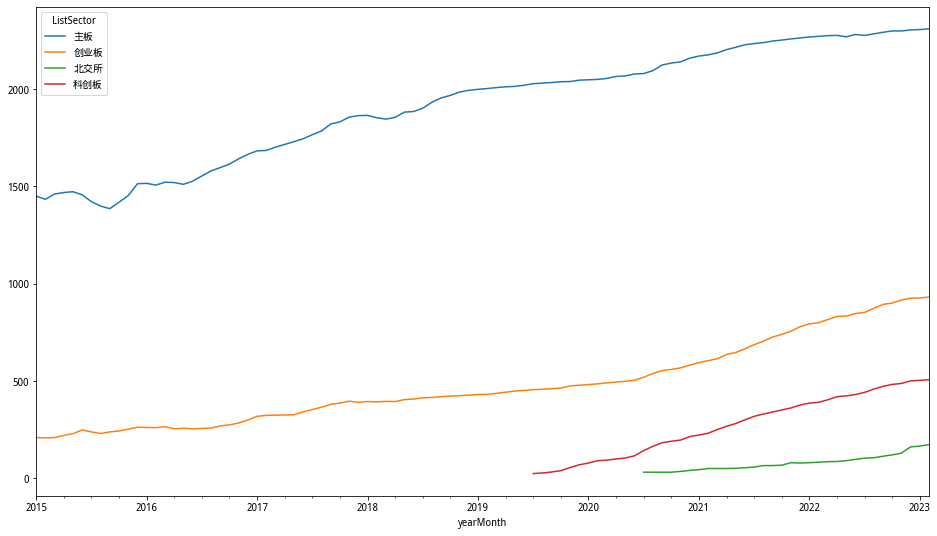

In [247]:
n_stk_by_list.plot()

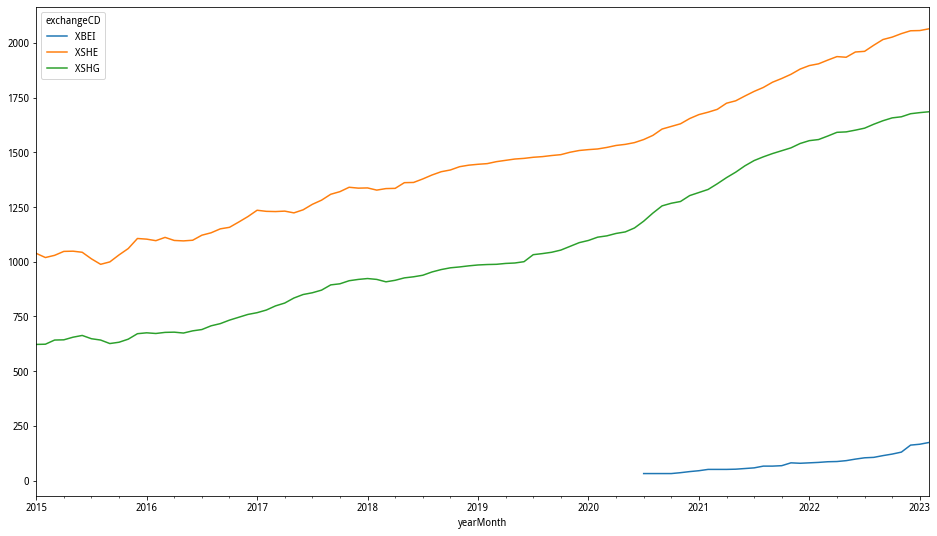

In [248]:
stk_df.groupby(['exchangeCD','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='secShortName').plot()

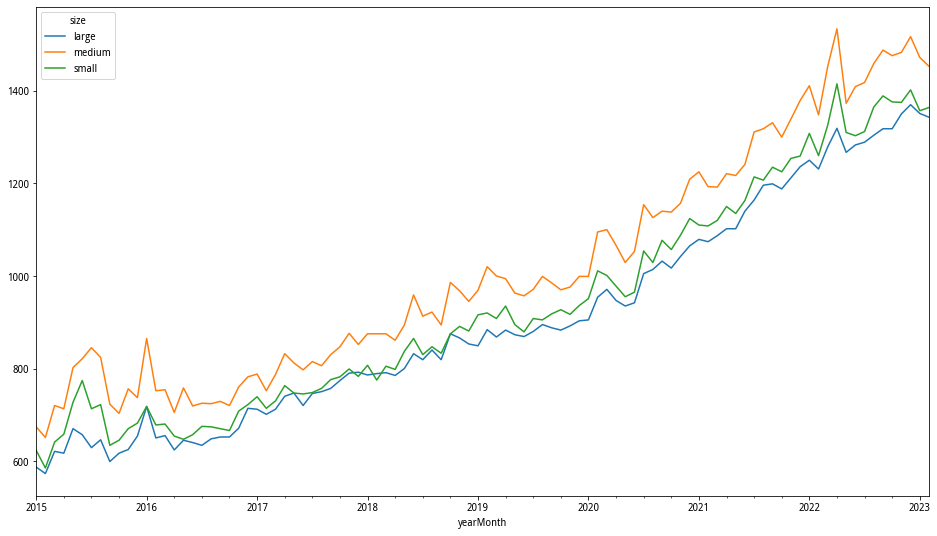

In [249]:
stk_df.groupby(['size','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='size',values='secShortName').plot()

## 总流通市值

In [250]:
stk_df.groupby(['yearMonth'])['negMarketValue'].sum()

yearMonth
2015-01    4.147572e+14
2015-02    3.079317e+14
2015-03    4.998537e+14
2015-04    5.726942e+14
2015-05    5.861970e+14
2015-06    6.671780e+14
2015-07    5.378125e+14
2015-08    4.764363e+14
2015-09    3.892521e+14
2015-10    3.683736e+14
2015-11    5.128286e+14
2015-12    5.818606e+14
2016-01    4.263211e+14
2016-02    3.196666e+14
2016-03    4.766333e+14
2016-04    4.408364e+14
2016-05    4.419609e+14
2016-06    4.383945e+14
2016-07    4.855870e+14
2016-08    5.447879e+14
2016-09    4.741685e+14
2016-10    3.913118e+14
2016-11    5.558533e+14
2016-12    5.483477e+14
2017-01    4.498244e+14
2017-02    4.604550e+14
2017-03    5.988352e+14
2017-04    4.611545e+14
2017-05    4.923339e+14
2017-06    5.570306e+14
               ...     
2020-09    8.931745e+14
2020-10    6.603881e+14
2020-11    8.863478e+14
2020-12    9.880530e+14
2021-01    9.082509e+14
2021-02    6.866977e+14
2021-03    1.014242e+15
2021-04    9.344343e+14
2021-05    8.254503e+14
2021-06    9.969797e+14
2021-0

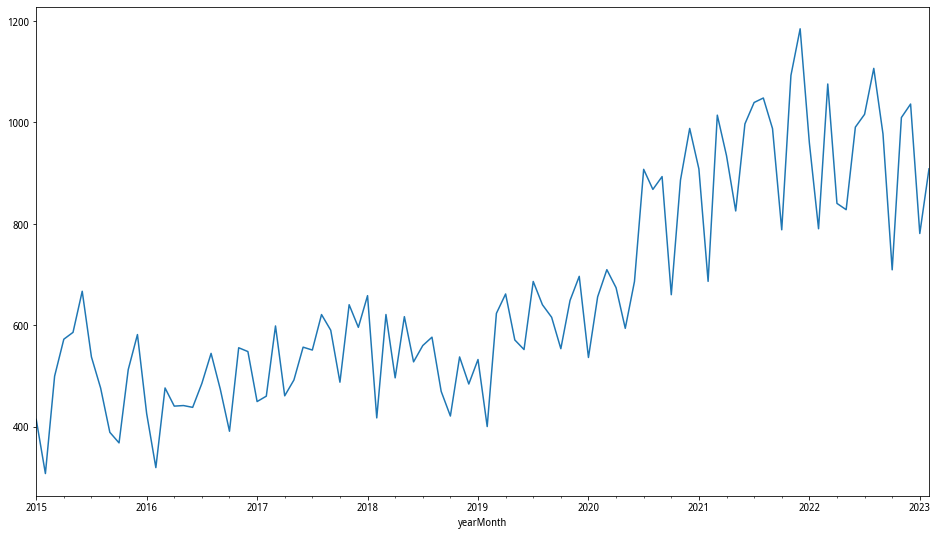

In [251]:
(stk_df.groupby(['yearMonth'])['negMarketValue'].sum() / 1e12).plot()

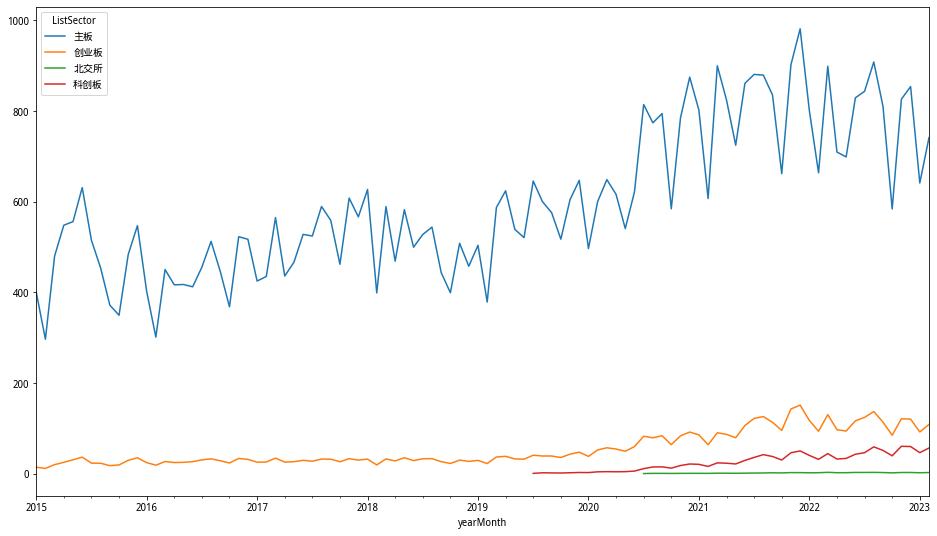

In [252]:
mkt_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='negMarketValue') / 1e12

mkt_value_by_sector.plot()

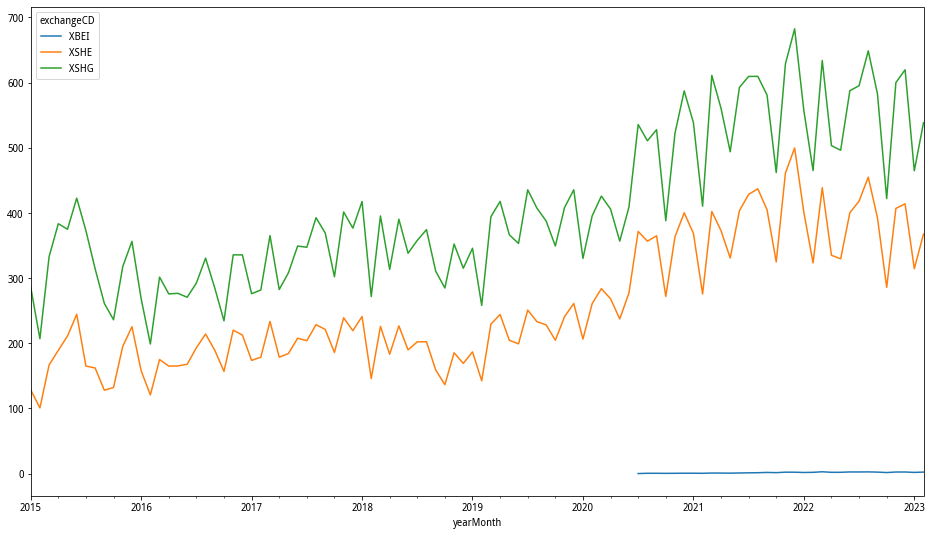

In [253]:
mkt_value_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

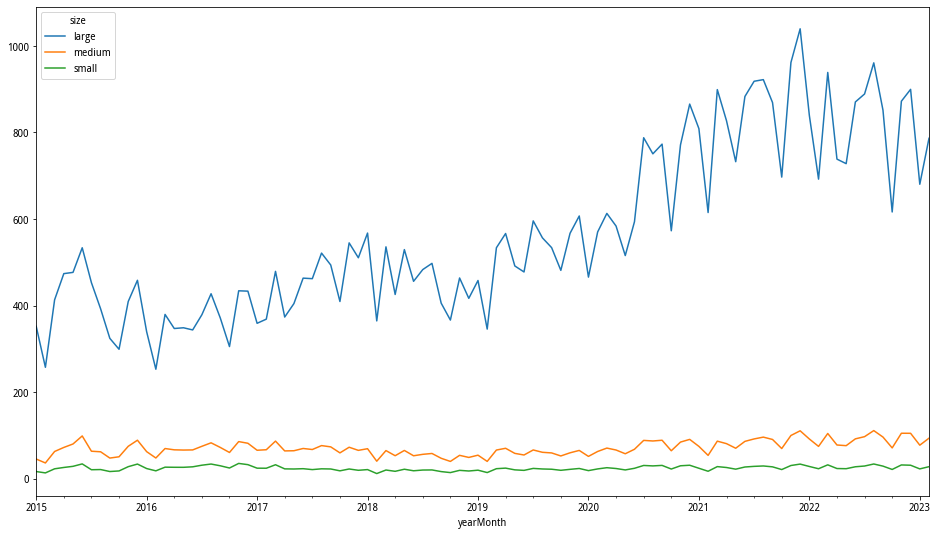

In [254]:
mkt_value_by_exch = stk_df.groupby(['size','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3688ba4410>,
      dtype=object)

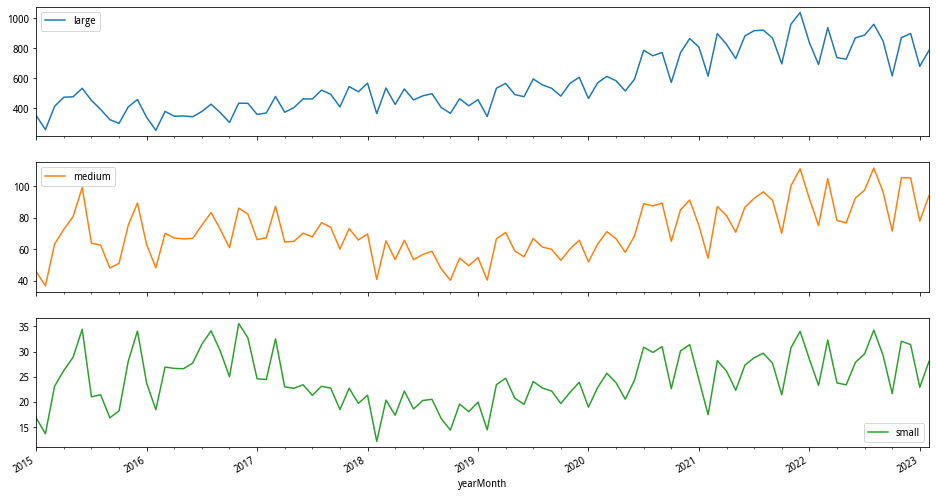

In [255]:
mkt_value_by_exch.plot(subplots=True)

## 总成交额

In [256]:
stk_df.groupby(['yearMonth'])['turnoverValue'].sum()

yearMonth
2015-01    8.694137e+12
2015-02    5.015072e+12
2015-03    1.350456e+13
2015-04    1.951906e+13
2015-05    1.979323e+13
2015-06    2.343783e+13
2015-07    1.803261e+13
2015-08    1.302525e+13
2015-09    7.527996e+12
2015-10    9.686700e+12
2015-11    1.430309e+13
2015-12    1.179777e+13
2016-01    7.041906e+12
2016-02    5.050951e+12
2016-03    8.596809e+12
2016-04    7.302497e+12
2016-05    5.826449e+12
2016-06    7.270024e+12
2016-07    8.070901e+12
2016-08    7.340591e+12
2016-09    5.320981e+12
2016-10    4.948791e+12
2016-11    8.888982e+12
2016-12    6.473511e+12
2017-01    4.343811e+12
2017-02    5.336474e+12
2017-03    7.550761e+12
2017-04    5.733739e+12
2017-05    5.092422e+12
2017-06    5.527104e+12
               ...     
2020-09    1.129194e+13
2020-10    8.011197e+12
2020-11    1.167322e+13
2020-12    1.245203e+13
2021-01    1.436162e+13
2021-02    9.647204e+12
2021-03    1.251067e+13
2021-04    1.094389e+13
2021-05    1.082708e+13
2021-06    1.418270e+13
2021-0

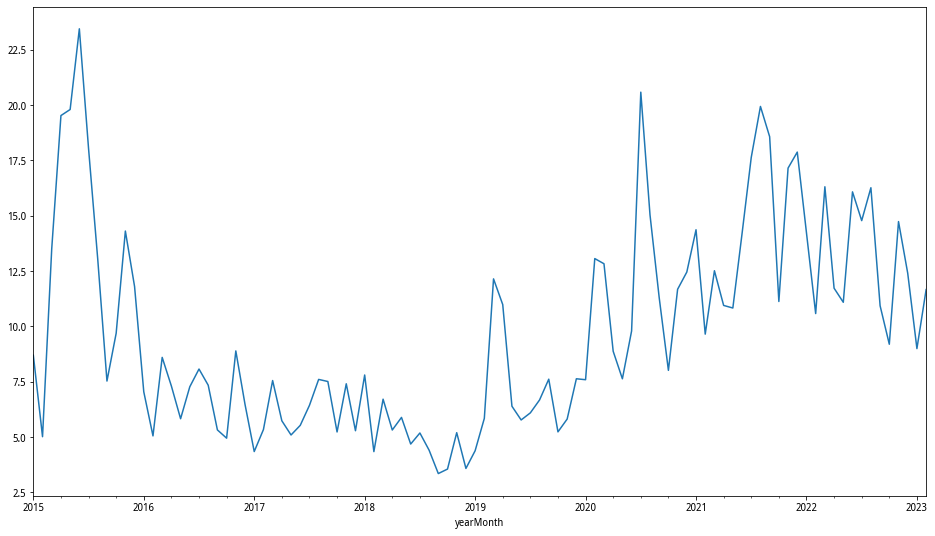

In [257]:
(stk_df.groupby(['yearMonth'])['turnoverValue'].sum() / 1e12).plot()

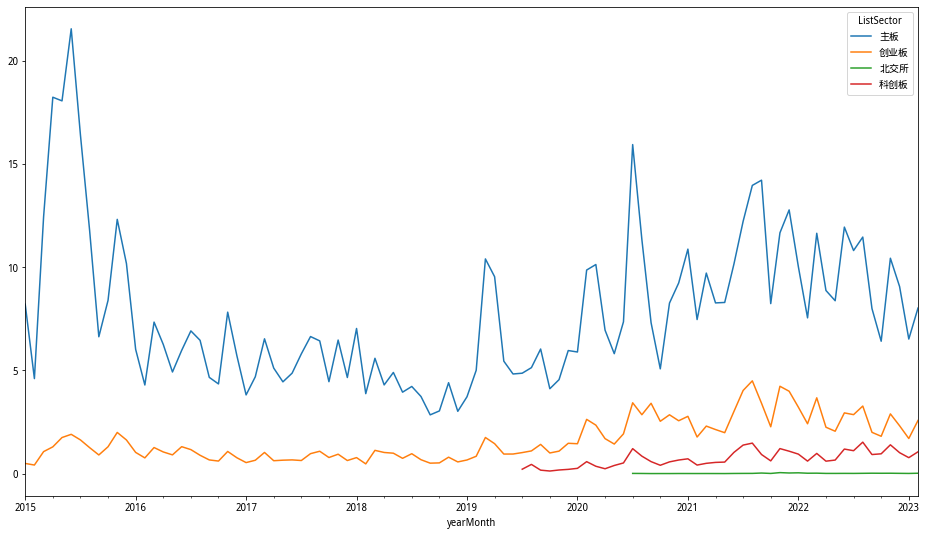

In [258]:
turnover_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

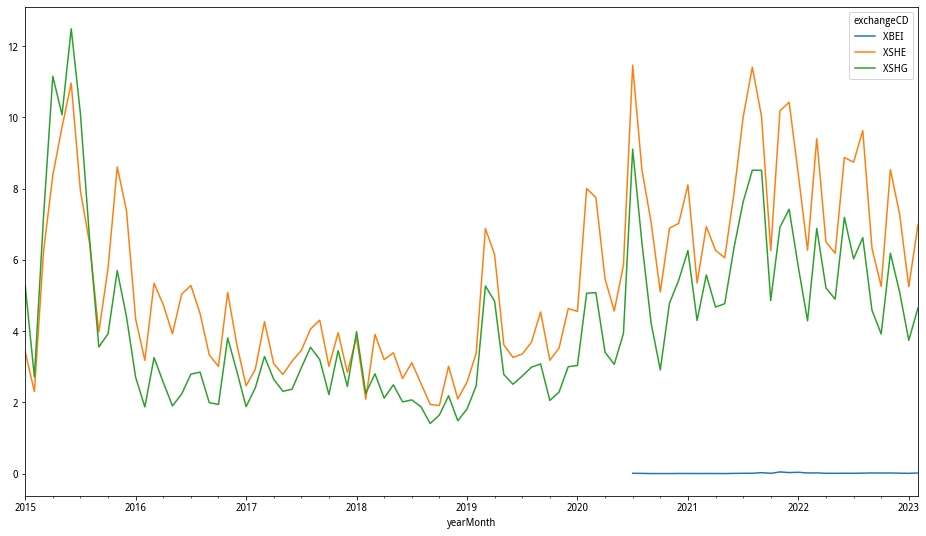

In [259]:
turnover_value_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

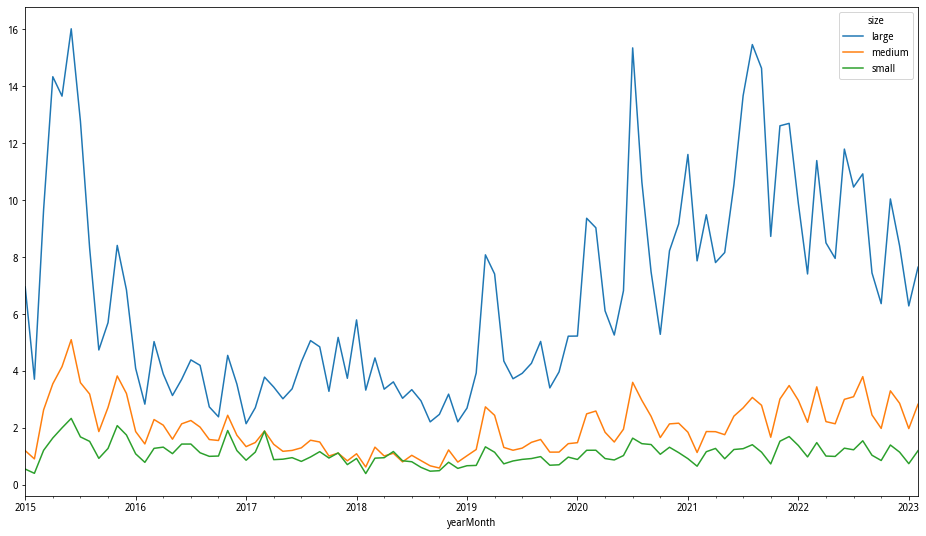

In [260]:
turnover_value_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

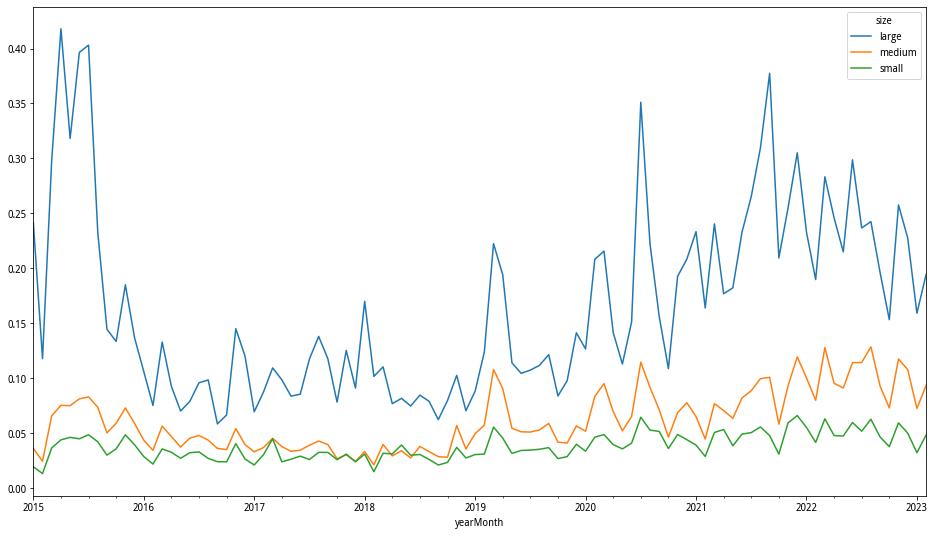

In [261]:
turnover_vol_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverVol'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverVol') / 1e12

turnover_vol_by_sector.plot()

## 平均换手率

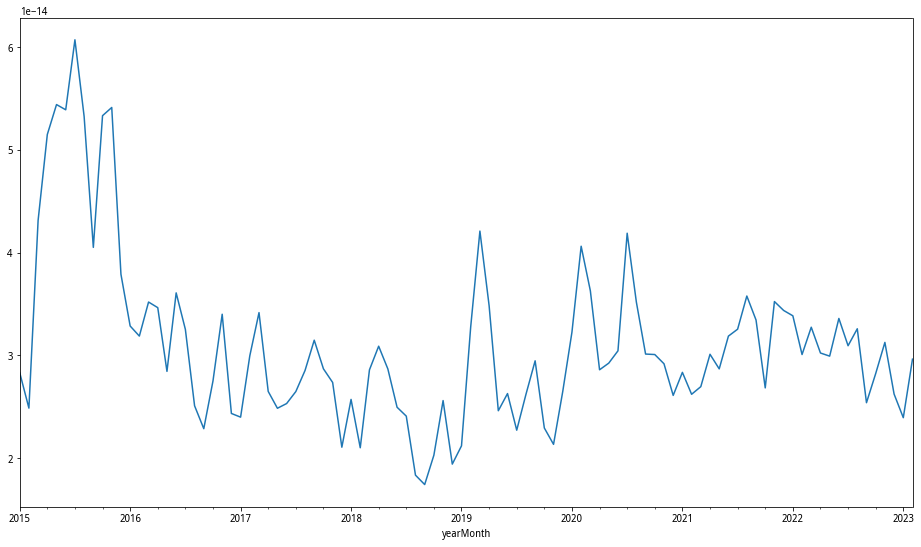

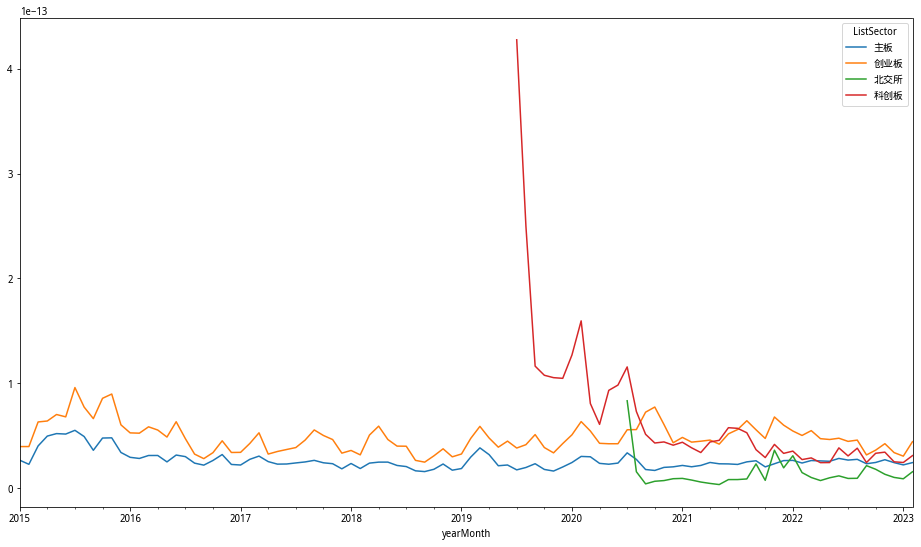

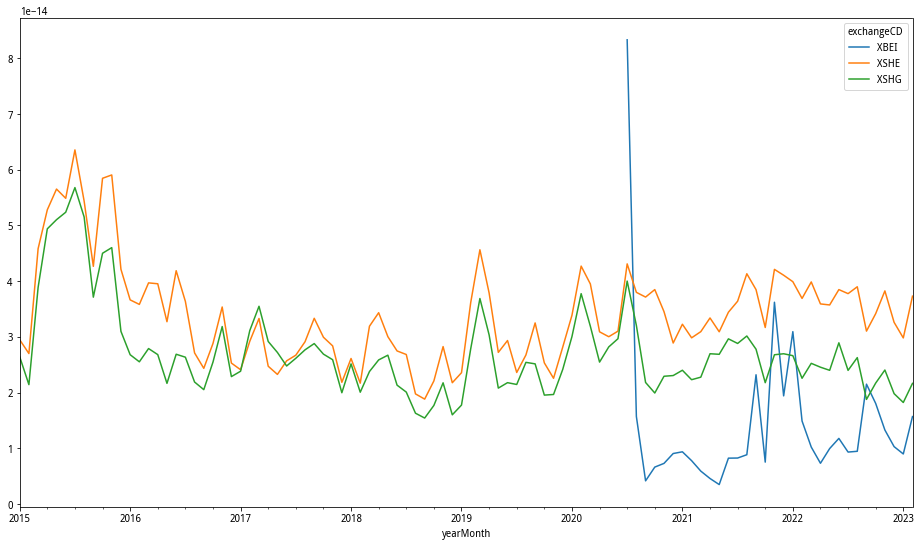

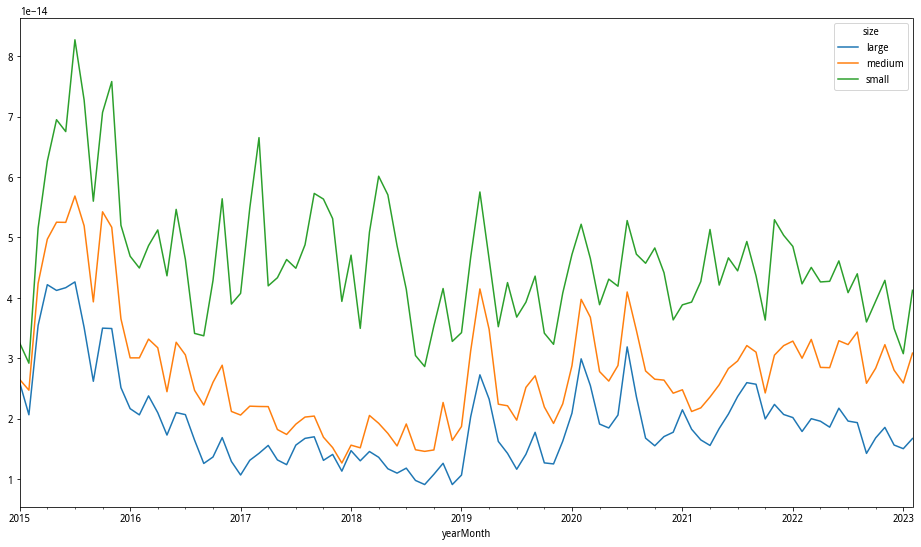

In [262]:
stk_df.groupby(['yearMonth'])['turnoverRate'].mean()

(stk_df.groupby(['yearMonth'])['turnoverRate'].mean() / 1e12).plot()

turnover_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_size = stk_df.groupby(['size','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='size',values='turnoverRate') / 1e12

turnover_by_size.plot()

## 平均收益率

In [263]:
stk_df

secID  tradeDate secShortName exchangeCD  preClosePrice  \
0        000001.XSHE 2015-01-05         平安银行       XSHE       1293.044   
1        000001.XSHE 2015-01-06         平安银行       XSHE       1307.737   
2        000001.XSHE 2015-01-07         平安银行       XSHE       1288.146   
3        000001.XSHE 2015-01-08         平安银行       XSHE       1263.656   
4        000001.XSHE 2015-01-09         平安银行       XSHE       1221.208   
5        000001.XSHE 2015-01-12         平安银行       XSHE       1231.004   
6        000001.XSHE 2015-01-13         平安银行       XSHE       1205.698   
7        000001.XSHE 2015-01-14         平安银行       XSHE       1198.351   
8        000001.XSHE 2015-01-15         平安银行       XSHE       1208.963   
9        000001.XSHE 2015-01-16         平安银行       XSHE       1253.044   
10       000001.XSHE 2015-01-19         平安银行       XSHE       1254.677   
11       000001.XSHE 2015-01-20         平安银行       XSHE       1128.964   
12       000001.XSHE 2015-01-21         平安银行       XSHE       1128.964   
13       000001.XSHE 2015-01-22         平安银行       XSHE       1177.127   
14       000001.XSHE 2015-01-23         平安银行       XSHE       1167.331   
15       000001.XSHE 2015-01-26         平安银行       XSHE       1175.494   
16       000001.XSHE 2015-01-27         平安银行       XSHE       1170.596   
17       000001.XSHE 2015-01-28         平安银行       XSHE       1142.025   
18       000001.XSHE 2015-01-29         平安银行       XSHE       1147.739   
19       000001.XSHE 2015-01-30         平安银行       XSHE       1134.678   
20       000002.XSHE 2015-01-05          万科A       XSHE       1567.420   
21       000002.XSHE 2015-01-06          万科A       XSHE       1681.312   
22       000002.XSHE 2015-01-07          万科A       XSHE       1619.292   
23       000002.XSHE 2015-01-08          万科A       XSHE       1604.632   
24       000002.XSHE 2015-01-09          万科A       XSHE       1532.463   
25       000002.XSHE 2015-01-12          万科A       XSHE       1516.676   
26       000002.XSHE 2015-01-13          万科A       XSHE       1479.464   
27       000002.XSHE 2015-01-14          万科A       XSHE       1473.826   
28       000002.XSHE 2015-01-15          万科A       XSHE       1477.209   
29       000002.XSHE 2015-01-16          万科A       XSHE       1552.761   
...              ...        ...          ...        ...            ...   
4953699  900953.XSHG 2023-02-09          凯马B       XSHG          0.486   
4953700  900953.XSHG 2023-02-10          凯马B       XSHG          0.480   
4953701  900953.XSHG 2023-02-13          凯马B       XSHG          0.478   
4953702  900953.XSHG 2023-02-14          凯马B       XSHG          0.467   
4953703  900953.XSHG 2023-02-15          凯马B       XSHG          0.455   
4953704  900953.XSHG 2023-02-16          凯马B       XSHG          0.453   
4953705  900953.XSHG 2023-02-17          凯马B       XSHG          0.451   
4953706  900953.XSHG 2023-02-20          凯马B       XSHG          0.455   
4953707  900953.XSHG 2023-02-21          凯马B       XSHG          0.459   
4953708  900953.XSHG 2023-02-22          凯马B       XSHG          0.460   
4953709  900953.XSHG 2023-02-23          凯马B       XSHG          0.457   
4953710  900953.XSHG 2023-02-24          凯马B       XSHG          0.462   
4953711  900957.XSHG 2023-02-01         凌云B股       XSHG          0.590   
4953712  900957.XSHG 2023-02-02         凌云B股       XSHG          0.602   
4953713  900957.XSHG 2023-02-03         凌云B股       XSHG          0.598   
4953714  900957.XSHG 2023-02-06         凌云B股       XSHG          0.593   
4953715  900957.XSHG 2023-02-07         凌云B股       XSHG          0.589   
4953716  900957.XSHG 2023-02-08         凌云B股       XSHG          0.587   
4953717  900957.XSHG 2023-02-09         凌云B股       XSHG          0.582   
4953718  900957.XSHG 2023-02-10         凌云B股       XSHG          0.581   
4953719  900957.XSHG 2023-02-13         凌云B股       XSHG          0.580   
4953720  900957.XSHG 2023-02-14         凌云B股       XSHG          0.580   
4953721  900957.XSH

In [264]:
stk_df['ret'] = stk_df['closePrice'] / stk_df['preClosePrice'] - 1

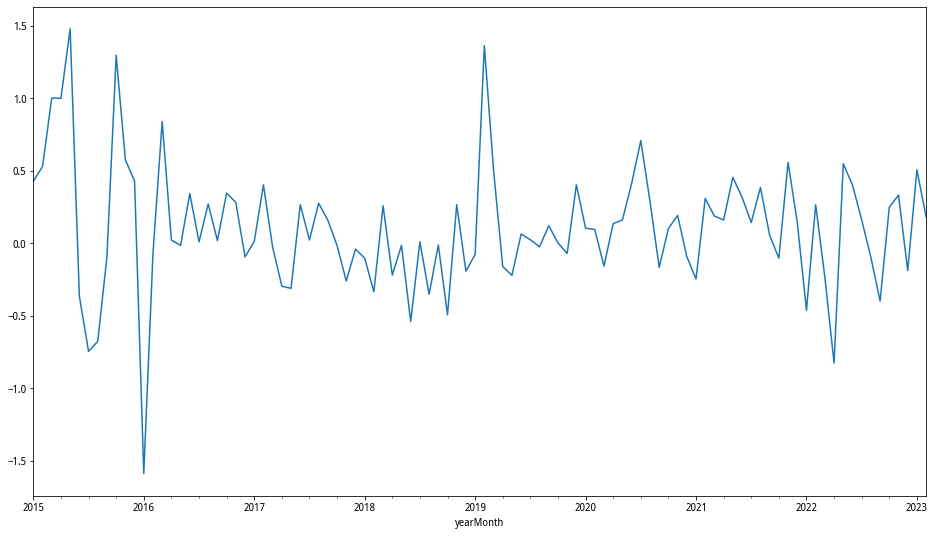

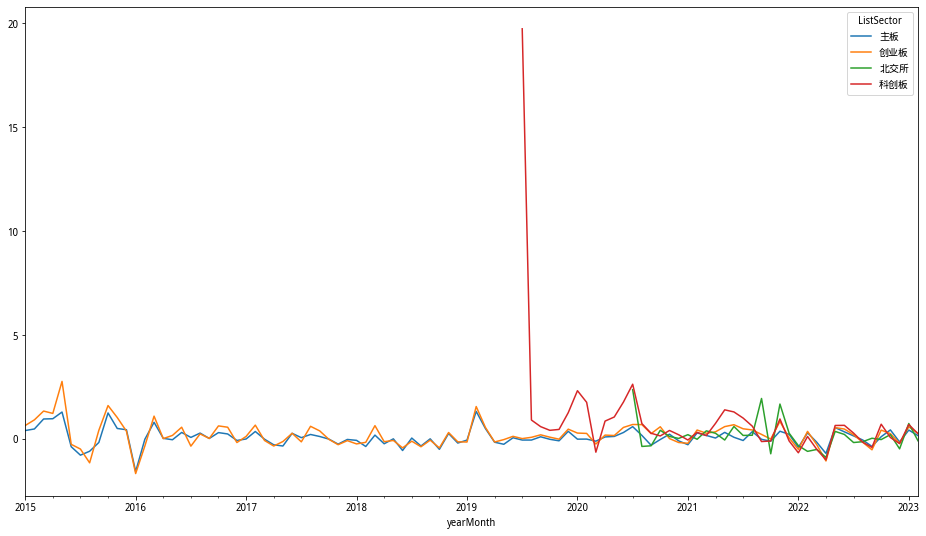

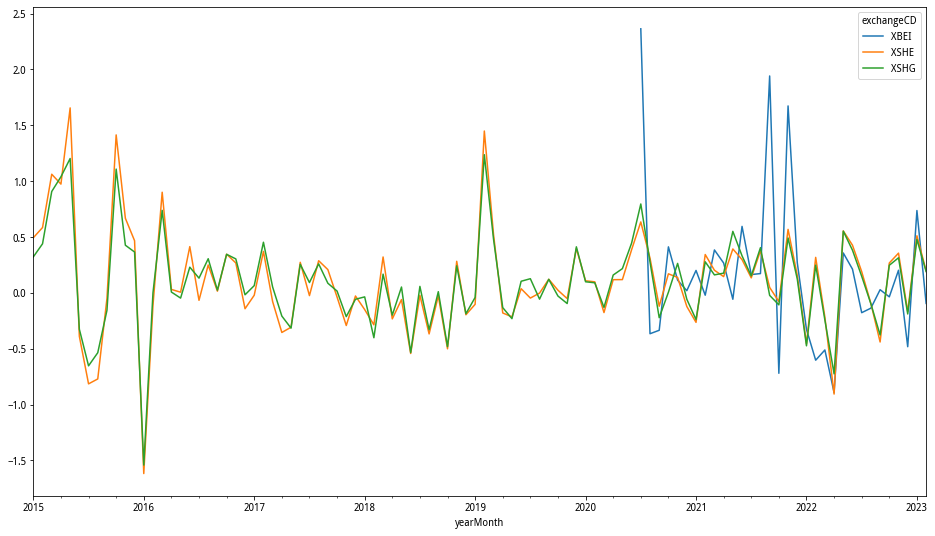

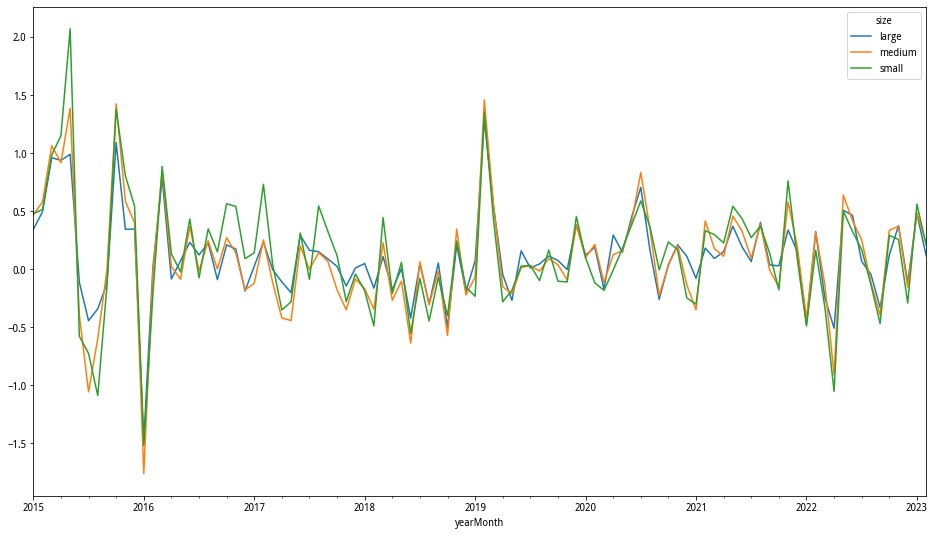

In [265]:
stk_df.groupby(['yearMonth'])['ret'].mean()

(stk_df.groupby(['yearMonth'])['ret'].mean() * 100).plot()

ret_by_sector = stk_df.groupby(['ListSector','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='ret') * 100

ret_by_sector.plot()

ret_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='ret') * 100

ret_by_exch.plot()

ret_by_size = stk_df.groupby(['size','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='size',values='ret') * 100

ret_by_size.plot()

## 波动率

In [267]:
stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean()

yearMonth
2015-01    0.029722
2015-02    0.024495
2015-03    0.029858
2015-04    0.039432
2015-05    0.045547
2015-06    0.057593
2015-07    0.071190
2015-08    0.063790
2015-09    0.053975
2015-10    0.041329
2015-11    0.038500
2015-12    0.032833
2016-01    0.053660
2016-02    0.042113
2016-03    0.033564
2016-04    0.027960
2016-05    0.029785
2016-06    0.027328
2016-07    0.024015
2016-08    0.020056
2016-09    0.020464
2016-10    0.019933
2016-11    0.021079
2016-12    0.025019
2017-01    0.024982
2017-02    0.018871
2017-03    0.019801
2017-04    0.025640
2017-05    0.024974
2017-06    0.022723
             ...   
2020-09    0.036716
2020-10    0.030421
2020-11    0.027928
2020-12    0.031082
2021-01    0.034875
2021-02    0.035843
2021-03    0.034299
2021-04    0.033721
2021-05    0.031336
2021-06    0.036194
2021-07    0.040907
2021-08    0.037256
2021-09    0.039046
2021-10    0.029844
2021-11    0.031615
2021-12    0.028788
2022-01    0.032477
2022-02    0.027352
2022-03   

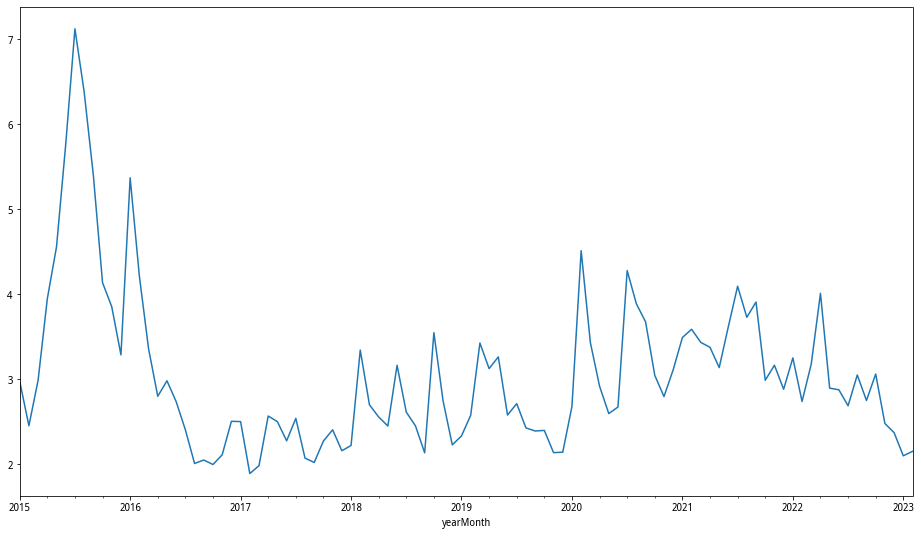

In [268]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

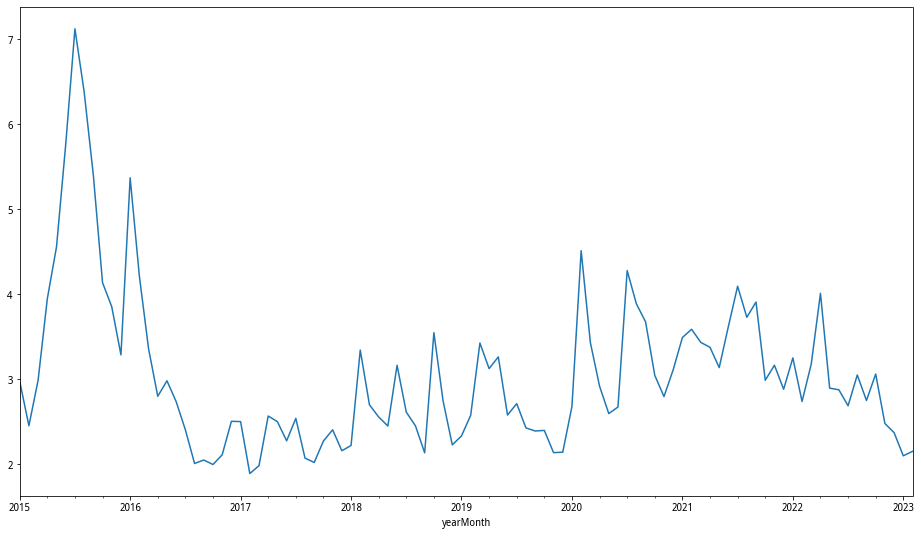

In [269]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

In [270]:
vol = stk_df.groupby(['yearMonth','secShortName'])['ret'].std()

In [275]:
temp = stk_df[['secShortName','yearMonth','ListSector','exchangeCD','size']].drop_duplicates(['secShortName','yearMonth'])

In [276]:
vol = pd.merge(vol,temp,on=['secShortName','yearMonth'])

In [289]:
del temp

In [277]:
vol.rename(columns={'ret':'vol'},inplace=True)

In [288]:
vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol')

ListSector        主板       创业板       北交所       科创板
yearMonth                                         
2015-01     0.455578  0.494131       NaN       NaN
2015-02     0.365375  0.477321       NaN       NaN
2015-03     0.441146  0.611403       NaN       NaN
2015-04     0.587533  0.766338       NaN       NaN
2015-05     0.678316  0.879831       NaN       NaN
2015-06     0.870188  1.022701       NaN       NaN
2015-07     1.099314  1.123918       NaN       NaN
2015-08     0.977379  1.054251       NaN       NaN
2015-09     0.812973  0.972068       NaN       NaN
2015-10     0.624022  0.734405       NaN       NaN
2015-11     0.571314  0.740562       NaN       NaN
2015-12     0.497431  0.573811       NaN       NaN
2016-01     0.811498  0.945818       NaN       NaN
2016-02     0.637694  0.738164       NaN       NaN
2016-03     0.502466  0.620396       NaN       NaN
2016-04     0.419826  0.512378       NaN       NaN
2016-05     0.443921  0.563787       NaN       NaN
2016-06     0.401408  0.555168       NaN       NaN
2016-07     0.361582  0.435236       NaN       NaN
2016-08     0.307763  0.328642       NaN       NaN
2016-09     0.309474  0.361943       NaN       NaN
2016-10     0.302877  0.343848       NaN       NaN
2016-11     0.316656  0.383453       NaN       NaN
2016-12     0.370834  0.480263       NaN       NaN
2017-01     0.359816  0.531233       NaN       NaN
2017-02     0.282055  0.345874       NaN       NaN
2017-03     0.300461  0.339619       NaN       NaN
2017-04     0.387469  0.448440       NaN       NaN
2017-05     0.371204  0.469778       NaN       NaN
2017-06     0.332640  0.451198       NaN       NaN
...              ...       ...       ...       ...
2020-09     0.376462  1.123141  0.199500  1.188810
2020-10     0.347312  0.879592  0.338384  0.681917
2020-11     0.343617  0.661189  0.247794  0.774861
2020-12     0.390251  0.635590  0.349276  1.008932
2021-01     0.446392  0.789555  0.485597  0.799012
2021-02     0.452661  0.850541  0.346828  0.796699
2021-03     0.397038  0.885819  0.316649  0.879138
2021-04     0.382588  0.823471  0.270621  1.004066
2021-05     0.370609  0.637836  0.195918  1.090903
2021-06     0.358957  0.825939  0.353945  1.508688
2021-07     0.399031  1.035213  0.402517  1.461255
2021-08     0.408628  0.863535  0.514573  1.121212
2021-09     0.450685  0.994580  0.910804  0.734020
2021-10     0.406782  0.579149  0.491993  0.566835
2021-11     0.366695  0.642872  1.975433  0.604956
2021-12     0.386331  0.586757  0.484447  0.504512
2022-01     0.448425  0.616985  0.641035  0.562095
2022-02     0.390242  0.502998  0.422482  0.456453
2022-03     0.466196  0.569265  0.411073  0.498635
2022-04     0.589139  0.709960  0.479700  0.645374
2022-05     0.434671  0.469276  0.446441  0.477933
2022-06     0.411010  0.472982  0.332082  0.595425
2022-07     0.398468  0.443856  0.237681  0.494180
2022-08     0.427230  0.538178  0.287630  0.611173
2022-09     0.400420  0.430082  0.680530  0.477771
2022-10     0.422895  0.504917  0.367292  0.683584
2022-11     0.356057  0.413365  0.300606  0.479561
2022-12     0.346671  0.393080  0.304020  0.431653
2023-01     0.299135  0.326733  0.349332  0.429618
2023-02     0.286203  0.381253  0.367768  0.444371

[98 rows x 4 columns]

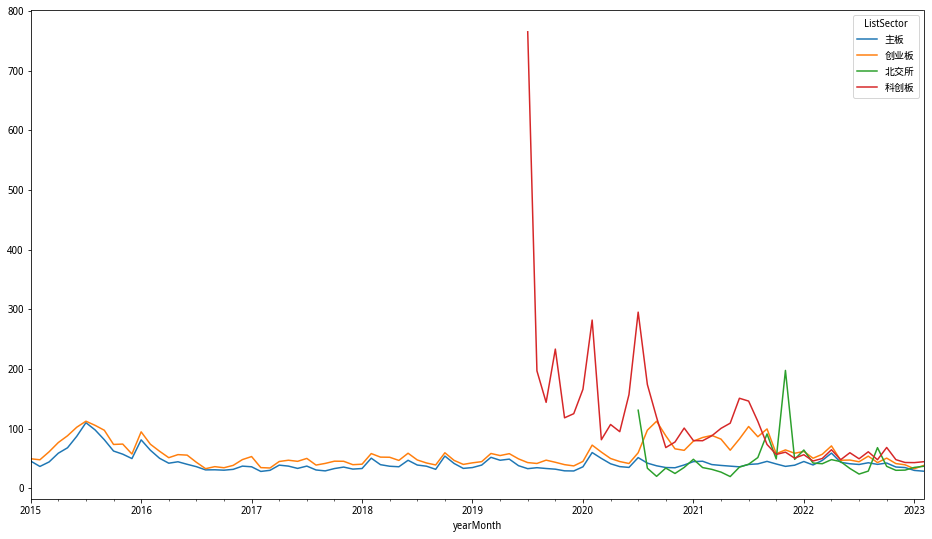

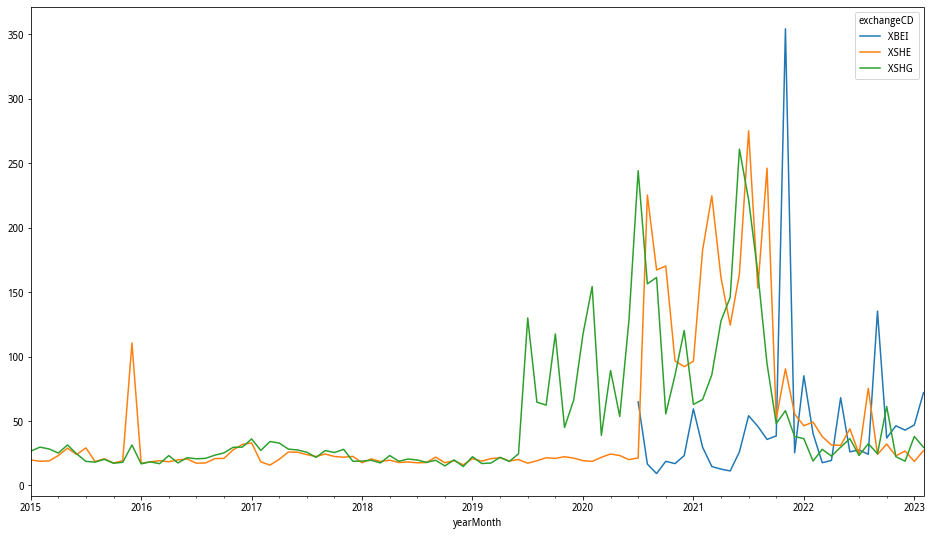

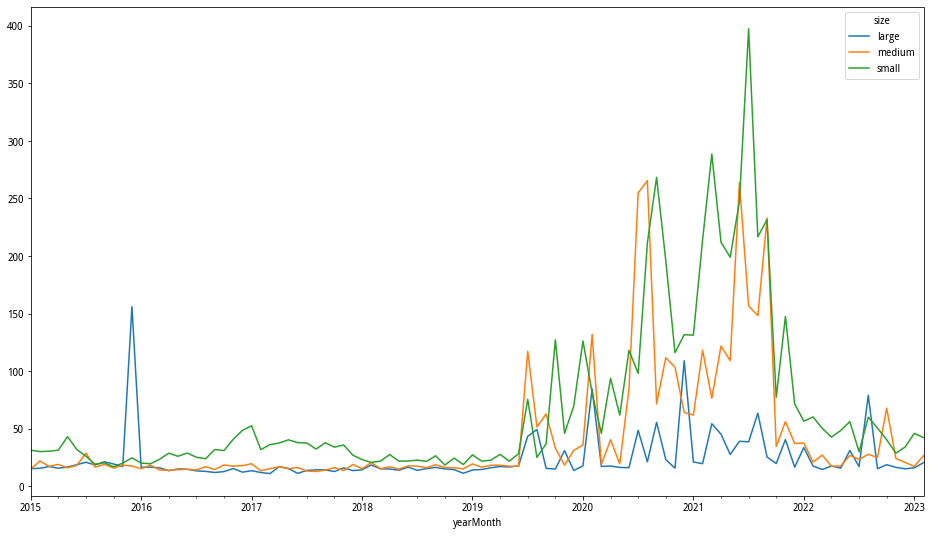

In [294]:
vol_by_sector = vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['exchangeCD','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['size','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='size',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

## 所有在一起

In [295]:
group = stk_df.groupby(['yearMonth'])[['negMarketValue','turnoverValue','turnoverRate','ret']].agg({'negMarketValue':'sum','turnoverValue':'sum',
                                                                                                    'turnoverRate':'mean','ret':'mean'})

In [296]:
vol_mean = vol.groupby('yearMonth')['vol'].mean()

In [297]:
group = pd.merge(group,vol_mean,on='yearMonth')

In [298]:
# Standardize
from sklearn.preprocessing import StandardScaler

In [299]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2015-01      4.147572e+14   8.694137e+12      0.028319  0.004286  0.029722
2015-02      3.079317e+14   5.015072e+12      0.024867  0.005292  0.024495
2015-03      4.998537e+14   1.350456e+13      0.043129  0.010019  0.029858
2015-04      5.726942e+14   1.951906e+13      0.051484  0.009994  0.039432
2015-05      5.861970e+14   1.979323e+13      0.054395  0.014795  0.045547
2015-06      6.671780e+14   2.343783e+13      0.053887 -0.003640  0.057593
2015-07      5.378125e+14   1.803261e+13      0.060696 -0.007463  0.071190
2015-08      4.764363e+14   1.302525e+13      0.053238 -0.006768  0.063790
2015-09      3.892521e+14   7.527996e+12      0.040504 -0.000913  0.053975
2015-10      3.683736e+14   9.686700e+12      0.053315  0.012970  0.041329
2015-11      5.128286e+14   1.430309e+13      0.054112  0.005760  0.038500
2015-12      5.818606e+14   1.179777e+13      0.037888  0.004283  0.032833
2016-01      4.263211e+14   7.041906e+12      0.032856 -0.015889  0.053660
2016-02      3.196666e+14   5.050951e+12      0.031874 -0.000686  0.042113
2016-03      4.766333e+14   8.596809e+12      0.035186  0.008389  0.033564
2016-04      4.408364e+14   7.302497e+12      0.034639  0.000217  0.027960
2016-05      4.419609e+14   5.826449e+12      0.028442 -0.000146  0.029785
2016-06      4.383945e+14   7.270024e+12      0.036076  0.003428  0.027328
2016-07      4.855870e+14   8.070901e+12      0.032523  0.000092  0.024015
2016-08      5.447879e+14   7.340591e+12      0.025094  0.002710  0.020056
2016-09      4.741685e+14   5.320981e+12      0.022866  0.000184  0.020464
2016-10      3.913118e+14   4.948791e+12      0.027512  0.003459  0.019933
2016-11      5.558533e+14   8.888982e+12      0.033999  0.002817  0.021079
2016-12      5.483477e+14   6.473511e+12      0.024347 -0.000939  0.025019
2017-01      4.498244e+14   4.343811e+12      0.023988  0.000117  0.024982
2017-02      4.604550e+14   5.336474e+12      0.029957  0.004027  0.018871
2017-03      5.988352e+14   7.550761e+12      0.034157 -0.000272  0.019801
2017-04      4.611545e+14   5.733739e+12      0.026491 -0.002963  0.025640
2017-05      4.923339e+14   5.092422e+12      0.024852 -0.003111  0.024974
2017-06      5.570306e+14   5.527104e+12      0.025312  0.002660  0.022723
...                   ...            ...           ...       ...       ...
2020-09      8.931745e+14   1.129194e+13      0.030126 -0.001668  0.036716
2020-10      6.603881e+14   8.011197e+12      0.030079  0.001015  0.030421
2020-11      8.863478e+14   1.167322e+13      0.029182  0.001922  0.027928
2020-12      9.880530e+14   1.245203e+13      0.026103 -0.000923  0.031082
2021-01      9.082509e+14   1.436162e+13      0.028345 -0.002466  0.034875
2021-02      6.866977e+14   9.647204e+12      0.026212  0.003092  0.035843
2021-03      1.014242e+15   1.251067e+13      0.026956  0.001872  0.034299
2021-04      9.344343e+14   1.094389e+13      0.030105  0.001609  0.033721
2021-05      8.254503e+14   1.082708e+13      0.028684  0.004552  0.031336
2021-06      9.969797e+14   1.418270e+13      0.031871  0.003176  0.036194
2021-07      1.039199e+15   1.762824e+13      0.032546  0.001426  0.040907
2021-08      1.048031e+15   1.993098e+13      0.035771  0.003853  0.037256
2021-09      9.876700e+14   1.856355e+13      0.033439  0.000541  0.039046
2021-10      7.883067e+14   1.112148e+13      0.026834 -0.001034  0.029844
2021-11      1.092573e+15   1.714582e+13      0.035233  0.005580  0.031615
2021-12      1.184421e+15   1.786937e+13      0.034368  0.001452  0.028788
2022-01      9.599475e+14   1.422255e+13      0.033847 -0.004622  0.032477
2022-02      7.903977e+14   1.057614e+13      0.030080  0.002660  0.027352
2022-03      1.075639e+15   1.630322e+13      0.032736 -0.002359  0.031760
2022-04      8.403541e+14   1.172201e+13      0.030229 -0.008266  0.040074
2022-05      8.279561e+14   1.108627

In [300]:
group[['negMarketValue','turnoverValue','turnoverRate']] = StandardScaler().fit(group[['negMarketValue','turnoverValue','turnoverRate']]).transform(group[['negMarketValue','turnoverValue','turnoverRate']])

In [301]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2015-01         -1.176466      -0.231087     -0.331206  0.004286  0.029722
2015-02         -1.679359      -1.028282     -0.747522  0.005292  0.024495
2015-03         -0.775865       0.811254      1.454423  0.010019  0.029858
2015-04         -0.432960       2.114500      2.461850  0.009994  0.039432
2015-05         -0.369395       2.173908      2.812844  0.014795  0.045547
2015-06          0.011832       2.963635      2.751606 -0.003640  0.057593
2015-07         -0.597170       1.792411      3.572576 -0.007463  0.071190
2015-08         -0.886105       0.707395      2.673312 -0.006768  0.063790
2015-09         -1.296534      -0.483771      1.137981 -0.000913  0.053975
2015-10         -1.394822      -0.016015      2.682644  0.012970  0.041329
2015-11         -0.714784       0.984282      2.778759  0.005760  0.038500
2015-12         -0.389809       0.441421      0.822476  0.004283  0.032833
2016-01         -1.122027      -0.589099      0.215737 -0.015889  0.053660
2016-02         -1.624115      -1.020507      0.097393 -0.000686  0.042113
2016-03         -0.885177      -0.252177      0.496732  0.008389  0.033564
2016-04         -1.053695      -0.532633      0.430735  0.000217  0.027960
2016-05         -1.048402      -0.852469     -0.316471 -0.000146  0.029785
2016-06         -1.065191      -0.539670      0.604102  0.003428  0.027328
2016-07         -0.843027      -0.366132      0.175681  0.000092  0.024015
2016-08         -0.564333      -0.524379     -0.720137  0.002710  0.020056
2016-09         -0.896781      -0.961996     -0.988765  0.000184  0.020464
2016-10         -1.286838      -1.042644     -0.428551  0.003459  0.019933
2016-11         -0.512241      -0.188867      0.353647  0.002817  0.021079
2016-12         -0.547575      -0.712261     -0.810111 -0.000939  0.025019
2017-01         -1.011383      -1.173733     -0.853458  0.000117  0.024982
2017-02         -0.961339      -0.958639     -0.133747  0.004027  0.018871
2017-03         -0.309899      -0.478838      0.372652 -0.000272  0.019801
2017-04         -0.958046      -0.872558     -0.551713 -0.002963  0.025640
2017-05         -0.811265      -1.011521     -0.749248 -0.003111  0.024974
2017-06         -0.506699      -0.917332     -0.693781  0.002660  0.022723
...                   ...            ...           ...       ...       ...
2020-09          1.075735       0.331816     -0.113397 -0.001668  0.036716
2020-10         -0.020132      -0.379069     -0.119020  0.001015  0.030421
2020-11          1.043598       0.414433     -0.227182  0.001922  0.027928
2020-12          1.522386       0.583188     -0.598382 -0.000923  0.031082
2021-01          1.146709       0.996966     -0.328128 -0.002466  0.034875
2021-02          0.103723      -0.024573     -0.585269  0.003092  0.035843
2021-03          1.645675       0.595894     -0.495600  0.001872  0.034299
2021-04          1.269970       0.256398     -0.115853  0.001609  0.033721
2021-05          0.756916       0.231088     -0.287196  0.004552  0.031336
2021-06          1.564409       0.958197      0.097090  0.003176  0.036194
2021-07          1.763162       1.704790      0.178378  0.001426  0.040907
2021-08          1.804739       2.203758      0.567308  0.003853  0.037256
2021-09          1.520583       1.907457      0.286112  0.000541  0.039046
2021-10          0.582059       0.294880     -0.510320 -0.001034  0.029844
2021-11          2.014424       1.600256      0.502373  0.005580  0.031615
2021-12          2.446809       1.757039      0.398052  0.001452  0.028788
2022-01          1.390076       0.966832      0.335331 -0.004622  0.032477
2022-02          0.591902       0.176713     -0.118955  0.002660  0.027352
2022-03          1.934707       1.417681      0.201387 -0.002359  0.031760
2022-04          0.827077       0.425004     -0.101010 -0.008266  0.040074
2022-05          0.768712       0.28

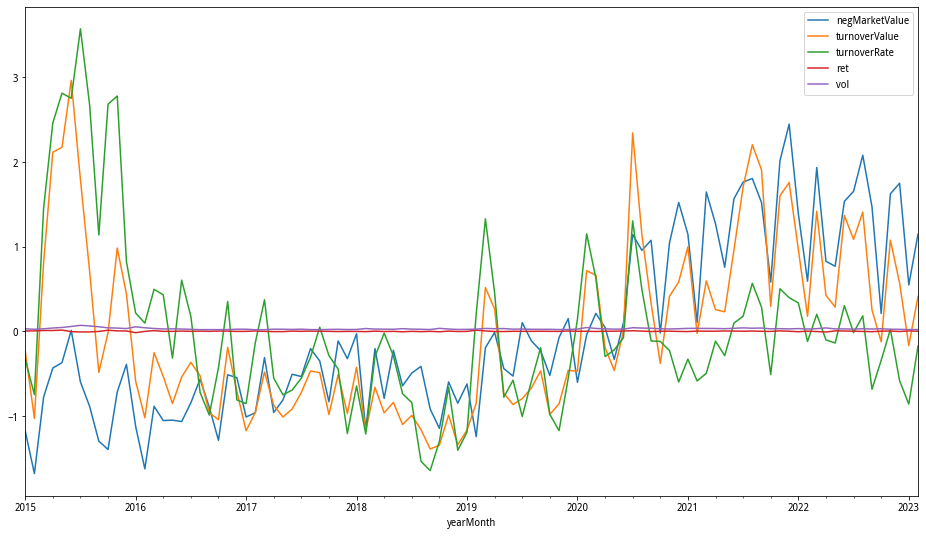

In [302]:
group.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3680217350>,
      dtype=object)

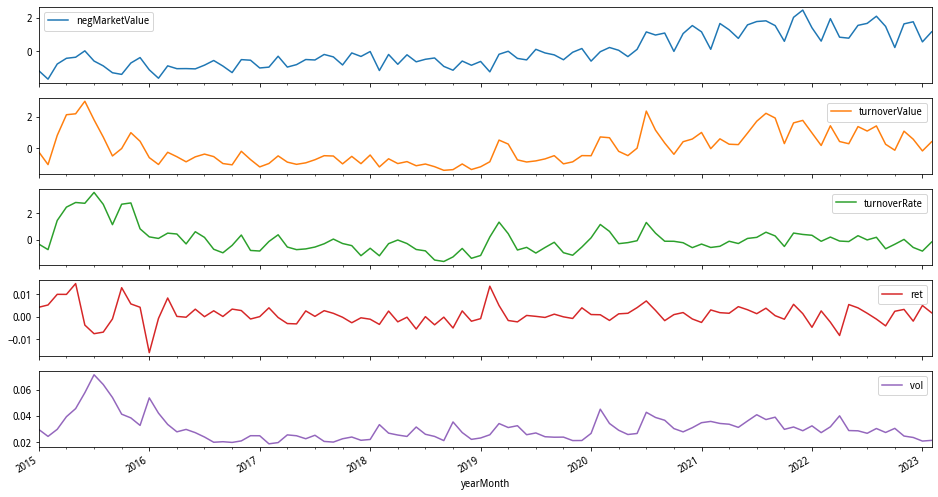

In [303]:
group.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36717bb7d0>,
      dtype=object)

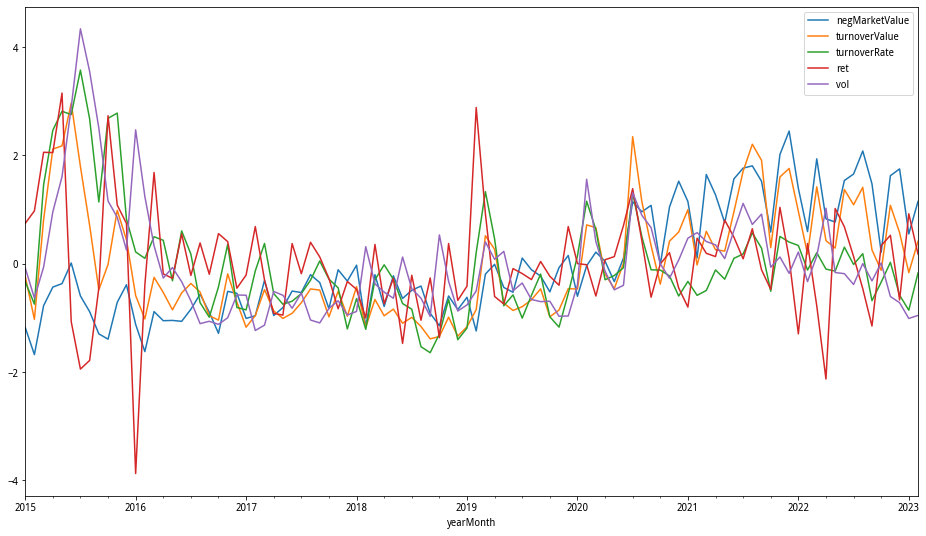

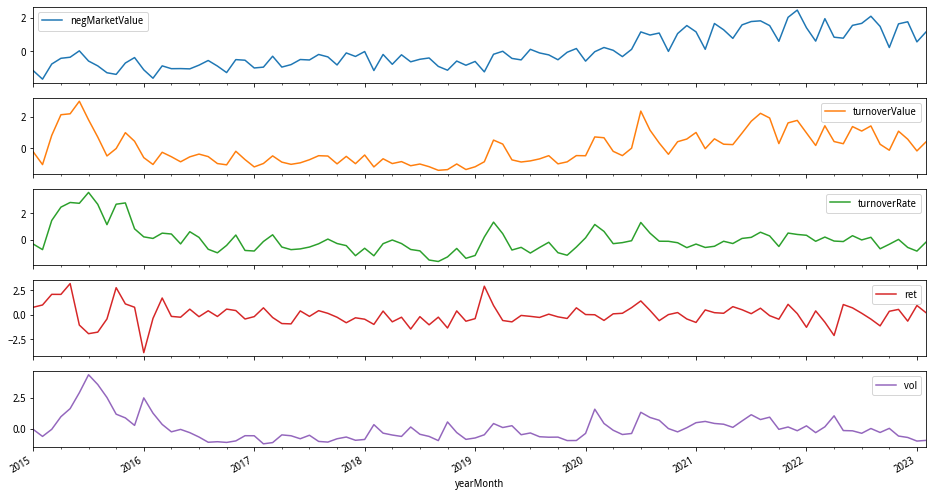

In [304]:
group[group.columns] = StandardScaler().fit(group).transform(group)

group.plot()

group.plot(subplots=True)

In [305]:
group[['turnoverRate','ret']].corr()

turnoverRate       ret
turnoverRate      1.000000  0.275426
ret               0.275426  1.000000

In [306]:
group[['turnoverValue','ret']].corr()

turnoverValue      ret
turnoverValue        1.00000  0.20424
ret                  0.20424  1.00000

In [307]:
group.corr()

negMarketValue  turnoverValue  turnoverRate       ret  \
negMarketValue        1.000000       0.677016      0.006667 -0.008838   
turnoverValue         0.677016       1.000000      0.671411  0.204240   
turnoverRate          0.006667       0.671411      1.000000  0.275426   
ret                  -0.008838       0.204240      0.275426  1.000000   
vol                   0.043859       0.552464      0.717741 -0.195899   

                     vol  
negMarketValue  0.043859  
turnoverValue   0.552464  
turnoverRate    0.717741  
ret            -0.195899  
vol             1.000000

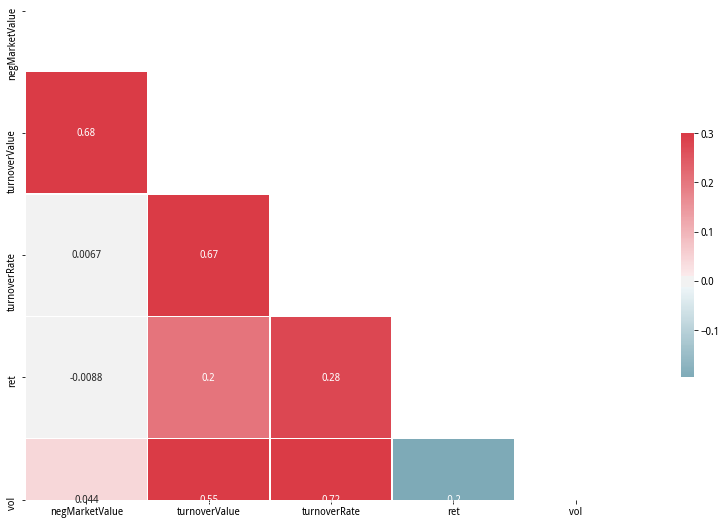

In [316]:
corr = group.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, annot_kws={"size": 10},cbar_kws={"shrink": .5})